### Capstone Project - PG DS C74
#### Siddhartha Srivastava and Harsh Patil

### Problem Statement
Consider yourself working for an associate at an investment firm that manages accounts for private clients. Your role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

#### Mr. Patrick Jyengar
- Wants to maintain a decent standard of living post Retirement
- Has always been a conservative investor
- Wants to invest $500K in Equities
- Expects to double his investment in 5 years

#### Mr. Peter Jyengar
- Prefers high return investments
- Can bounce back in case of losses
- Wants to invest $1 mn in high return stocks
- Expects high returns in 5 years

#### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#### Loading the Data

In [6]:
#Import Annexure
Annexure = pd.read_csv('Annexure-I.csv')
Annexure

Ticker         Industry                 Company Name
0     AAL         Aviation  American Airlines Group Inc
1    ALGT         Aviation     Allegiant Travel Company
2     ALK         Aviation         Alaska Air Group Inc
3     DAL         Aviation          Delta Air Lines Inc
4      HA         Aviation        Hawaiian Holdings Inc
5     LUV         Aviation        Southwest Airlines Co
6     BCS          Finance                     Barclays
7      CS          Finance                Credit Suisse
8      DB          Finance                Deutsche Bank
9      GS          Finance                Goldman Sachs
10     MS          Finance               Morgan Stanley
11    WFC          Finance                 Wells Fargo 
12    JNJ       Healthcare            Johnson & Johnson
13    MRK       Healthcare            Merck and CO inc.
14    PFE       Healthcare                   Pfizer inc
15   UNH        Healthcare        UnitedHealthGroup Inc
16    BHC  Pharmaceuticals  Bausch Health Companies inc
17  RHHBY  Pharmaceuticals             Roche Holding AG
18   AAPL       Technology                    Apple Inc
19   AMZN       Technology                       Amazon
20     FB       Technology                     Facebook
21   GOOG       Technology                     Alphabet
22    IBM       Technology                          IBM
23   MSFT       Technology                    Microsoft

#### Loading the data for 24 stocks from 5 different sectors: Aviation, Finance, Healthcare, Pharmaceuticals and Technology

In [8]:
# Import Aviation stocks
AAL  = pd.read_csv('AAL.csv')
ALGT = pd.read_csv('ALGT.csv')
ALK  = pd.read_csv('ALK.csv')
DAL  = pd.read_csv('DAL.csv')
HA   = pd.read_csv('HA.csv')
LUV  = pd.read_csv('LUV.csv')

# Import Finance stocks
BCS = pd.read_csv('BCS.csv')
CS  = pd.read_csv('CS.csv')
DB  = pd.read_csv('DB.csv')
GS  = pd.read_csv('GS.csv')
MS  = pd.read_csv('MS.csv')
WFC = pd.read_csv('WFC.csv')

# Import Pharma/Healthcare stocks
BHC   = pd.read_csv('BHC.csv')
JNJ   = pd.read_csv('JNJ.csv')
MRK   = pd.read_csv('MRK.csv')
PFE   = pd.read_csv('PFE.csv')           
RHHBY = pd.read_csv('RHHBY.csv')
UNH   = pd.read_csv('UNH.csv')

# Import Technology stocks
AAPL = pd.read_csv('AAPL.csv')
AMZN = pd.read_csv('AMZN.csv')
FB   = pd.read_csv('FB.csv')
GOOG = pd.read_csv('GOOG.csv')
IBM  = pd.read_csv('IBM.csv')
MSFT = pd.read_csv('MSFT.csv')

In [9]:
#Checking sample data of one stock
AAPL.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

#### Loading S&P 500 data

In [11]:
SP500 = pd.read_csv('S&P500.csv')
SP500.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

#### Cleaning and Merging Data
We only need to keep the "Date" and "Close" columns, and merge all the data in one single dataset

In [13]:
#Rename Close column with the name of the stock to use in the merged dataset

# S&P500
SP500 = SP500.rename(columns = {'Close':'S&P500'})

# Aviation
AAL = AAL.rename(columns = {'Close':'AAL'})
ALGT = ALGT.rename(columns = {'Close':'ALGT'})
ALK = ALK.rename(columns = {'Close':'ALK'})
DAL = DAL.rename(columns = {'Close':'DAL'})
HA = HA.rename(columns = {'Close':'HA'})
LUV = LUV.rename(columns = {'Close':'LUV'})

# Finance
BCS = BCS.rename(columns = {'Close':'BCS'})
CS = CS.rename(columns = {'Close':'CS'})
DB = DB.rename(columns = {'Close':'DB'})
GS = GS.rename(columns = {'Close':'GS'})
MS = MS.rename(columns = {'Close':'MS'})
WFC = WFC.rename(columns = {'Close':'WFC'})

# Pharma_healthcare
BHC = BHC.rename(columns = {'Close':'BHC'})
JNJ = JNJ.rename(columns = {'Close':'JNJ'})
MRK = MRK.rename(columns = {'Close':'MRK'})
PFE = PFE.rename(columns = {'Close':'PFE'})
RHHBY = RHHBY.rename(columns = {'Close':'RHHBY'})
UNH = UNH.rename(columns = {'Close':'UNH'})

# Technology
AAPL = AAPL.rename(columns = {'Close':'AAPL'})
AMZN = AMZN.rename(columns = {'Close':'AMZN'})
FB = FB.rename(columns = {'Close':'FB'})
GOOG = GOOG.rename(columns = {'Close':'GOOG'})
IBM = IBM.rename(columns = {'Close':'IBM'})
MSFT = MSFT.rename(columns = {'Close':'MSFT'})

#Check one sample
AAPL.head()

Date       Open       High        Low       AAPL  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

In [14]:
# Retain only "Date" and Close prices

# S&P500
SP500 = SP500[['Date','S&P500']]

# Aviation
AAL = AAL[['Date','AAL']]
ALGT = ALGT[['Date','ALGT']]
ALK = ALK[['Date','ALK']]
DAL = DAL[['Date','DAL']]
HA = HA[['Date','HA']]
LUV = LUV[['Date','LUV']]

# Finance
BCS = BCS[['Date','BCS']]
CS = CS[['Date','CS']]
DB = DB[['Date','DB']]
GS = GS[['Date','GS']]
MS = MS[['Date','MS']]
WFC = WFC[['Date','WFC']]

# Pharma_healthcare
BHC = BHC[['Date','BHC']]
JNJ = JNJ[['Date','JNJ']]
MRK = MRK[['Date','MRK']]
PFE = PFE[['Date','PFE']]
RHHBY = RHHBY[['Date','RHHBY']]
UNH = UNH[['Date','UNH']]

# Technology
AAPL = AAPL[['Date','AAPL']]
AMZN = AMZN[['Date','AMZN']]
FB = FB[['Date','FB']]
GOOG = GOOG[['Date','GOOG']]
IBM = IBM[['Date','IBM']]
MSFT = MSFT[['Date','MSFT']]

#Check sample
AAPL.head()

Date       AAPL
0  01-10-2010  10.090000
1  04-10-2010   9.951428
2  05-10-2010  10.319285
3  06-10-2010  10.328215
4  07-10-2010  10.329286

In [15]:
#Merge all the stocks and S&P 500 in one combined dataset using Date

# S&P500
merged_data = pd.merge(SP500, AAL, how='inner', on='Date')

# Aviation
merged_data = pd.merge(merged_data, ALGT, how='inner', on='Date')
merged_data = pd.merge(merged_data, ALK, how='inner', on='Date')
merged_data = pd.merge(merged_data, DAL, how='inner', on='Date')
merged_data = pd.merge(merged_data, HA, how='inner', on='Date')
merged_data = pd.merge(merged_data, LUV, how='inner', on='Date')

# Finance
merged_data = pd.merge(merged_data, BCS, how='inner', on='Date')
merged_data = pd.merge(merged_data, CS, how='inner', on='Date')
merged_data = pd.merge(merged_data, DB, how='inner', on='Date')
merged_data = pd.merge(merged_data, GS, how='inner', on='Date')
merged_data = pd.merge(merged_data, MS, how='inner', on='Date')
merged_data = pd.merge(merged_data, WFC, how='inner', on='Date')

# Pharma_healthcare
merged_data = pd.merge(merged_data, BHC, how='inner', on='Date')
merged_data = pd.merge(merged_data, JNJ, how='inner', on='Date')
merged_data = pd.merge(merged_data, MRK, how='inner', on='Date')
merged_data = pd.merge(merged_data, PFE, how='inner', on='Date')
merged_data = pd.merge(merged_data, RHHBY, how='inner', on='Date')
merged_data = pd.merge(merged_data, UNH, how='inner', on='Date')

# Technology
merged_data = pd.merge(merged_data, AAPL, how='inner', on='Date')
merged_data = pd.merge(merged_data, AMZN, how='inner', on='Date')
merged_data = pd.merge(merged_data, FB, how='inner', on='Date')
merged_data = pd.merge(merged_data, GOOG, how='inner', on='Date')
merged_data = pd.merge(merged_data, IBM, how='inner', on='Date')
merged_data = pd.merge(merged_data, MSFT, how='inner', on='Date')

#Check sample
merged_data.head()

Date       S&P500    AAL       ALGT        ALK    DAL    HA   LUV  \
0  18-05-2012  1295.219971  10.06  62.310001  16.170000  10.14  5.28  8.15   
1  21-05-2012  1315.989990  10.71  62.660000  16.379999  10.58  5.32  8.34   
2  22-05-2012  1316.630005  10.62  62.349998  16.225000  10.54  5.23  8.27   
3  23-05-2012  1318.859985  11.00  62.990002  16.115000  10.74  5.38  8.36   
4  24-05-2012  1320.680054  12.16  64.250000  16.920000  11.27  5.68  8.74   

         BCS         CS  ...        MRK        PFE      RHHBY        UNH  \
0  10.285714  19.169922  ...  37.820000  22.570000  20.160000  53.990002   
1  10.672812  19.541016  ...  37.599998  22.540001  20.389999  55.549999   
2  10.857142  19.863281  ...  37.459999  22.370001  20.430000  55.720001   
3  10.737328  19.765625  ...  37.340000  22.090000  20.075001  55.360001   
4  10.746544  19.658203  ...  37.599998  22.139999  19.855000  56.220001   

        AAPL        AMZN         FB        GOOG         IBM       MSFT  
0  18.942142  213.850006  38.230000  299.078979  195.880005  29.270000  
1  20.045713  218.110001  34.029999  305.908386  197.759995  29.750000  
2  19.891787  215.330002  31.000000  299.278229  196.820007  29.760000  
3  20.377142  217.279999  32.000000  303.592072  196.119995  29.110001  
4  20.190001  215.240005  33.029999  300.702881  196.089996  29.070000  

[5 rows x 26 columns]

In [16]:
#Set Date as the index
merged_data['Date']= pd.to_datetime(merged_data['Date'], format='%d-%m-%Y')
merged_data = merged_data.set_index('Date')
merged_data.head()

S&P500    AAL       ALGT        ALK    DAL    HA   LUV  \
Date                                                                      
2012-05-18  1295.219971  10.06  62.310001  16.170000  10.14  5.28  8.15   
2012-05-21  1315.989990  10.71  62.660000  16.379999  10.58  5.32  8.34   
2012-05-22  1316.630005  10.62  62.349998  16.225000  10.54  5.23  8.27   
2012-05-23  1318.859985  11.00  62.990002  16.115000  10.74  5.38  8.36   
2012-05-24  1320.680054  12.16  64.250000  16.920000  11.27  5.68  8.74   

                  BCS         CS         DB  ...        MRK        PFE  \
Date                                         ...                         
2012-05-18  10.285714  19.169922  34.370228  ...  37.820000  22.570000   
2012-05-21  10.672812  19.541016  35.505726  ...  37.599998  22.540001   
2012-05-22  10.857142  19.863281  35.410305  ...  37.459999  22.370001   
2012-05-23  10.737328  19.765625  35.381680  ...  37.340000  22.090000   
2012-05-24  10.746544  19.658203  34.828243  ...  37.599998  22.139999   

                RHHBY        UNH       AAPL        AMZN         FB  \
Date                                                                 
2012-05-18  20.160000  53.990002  18.942142  213.850006  38.230000   
2012-05-21  20.389999  55.549999  20.045713  218.110001  34.029999   
2012-05-22  20.430000  55.720001  19.891787  215.330002  31.000000   
2012-05-23  20.075001  55.360001  20.377142  217.279999  32.000000   
2012-05-24  19.855000  56.220001  20.190001  215.240005  33.029999   

                  GOOG         IBM       MSFT  
Date                                           
2012-05-18  299.078979  195.880005  29.270000  
2012-05-21  305.908386  197.759995  29.750000  
2012-05-22  299.278229  196.820007  29.760000  
2012-05-23  303.592072  196.119995  29.110001  
2012-05-24  300.702881  196.089996  29.070000  

[5 rows x 25 columns]

In [17]:
#Check Shape of data
merged_data.shape

(2106, 25)

The data contains 2106 records for 25 different stocks. This is because we have data for 10 years, however as per task we need to use only five years of data for our analysis

#### Reducing to 5 years data, checking for missing values and saving the final dataset

In [20]:
#Slice data from Oct 1, 2015
merged_data = merged_data['2015-10-01':]
merged_data.head()

S&P500        AAL        ALGT        ALK        DAL  \
Date                                                                   
2015-10-01  1923.819946  39.200001  217.979996  80.230003  45.410000   
2015-10-02  1951.359985  38.630001  215.589996  79.260002  44.869999   
2015-10-05  1987.050049  40.189999  216.059998  80.910004  46.959999   
2015-10-06  1979.920044  38.130001  208.600006  74.529999  45.090000   
2015-10-07  1995.829956  39.310001  213.839996  75.970001  45.990002   

                   HA        LUV    BCS         CS         DB  ...        MRK  \
Date                                                           ...              
2015-10-01  24.730000  38.410000  15.01  24.090000  26.520000  ...  49.369999   
2015-10-02  24.280001  38.380001  15.39  24.639999  27.139999  ...  50.139999   
2015-10-05  25.500000  39.299999  15.60  25.160000  28.200001  ...  51.230000   
2015-10-06  24.250000  38.000000  15.55  25.379999  28.400000  ...  49.799999   
2015-10-07  24.559999  38.709999  15.73  25.320000  28.790001  ...  50.950001   

                  PFE      RHHBY         UNH       AAPL        AMZN  \
Date                                                                  
2015-10-01  31.840000  33.220001  116.610001  27.395000  520.719971   
2015-10-02  33.080002  33.320000  118.830002  27.594999  532.539978   
2015-10-05  33.480000  33.439999  119.650002  27.695000  543.679993   
2015-10-06  32.790001  33.529999  116.050003  27.827499  537.479980   
2015-10-07  33.290001  32.549999  116.430000  27.695000  541.940002   

                   FB        GOOG         IBM       MSFT  
Date                                                      
2015-10-01  90.949997  611.289978  143.589996  44.610001  
2015-10-02  92.070000  626.909973  144.580002  45.570000  
2015-10-05  94.010002  641.469971  149.039993  46.630001  
2015-10-06  92.800003  645.440002  148.779999  46.750000  
2015-10-07  92.400002  642.359985  150.089996  46.799999  

[5 rows x 25 columns]

In [21]:
#Check shape
merged_data.shape

(1259, 25)

Now we have 1259 records for 24 stocks + S&P 500

In [23]:
#Check data
merged_data.describe()

S&P500          AAL         ALGT          ALK          DAL  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean   2608.429927    36.393948   144.722939    66.828475    48.221382   
std     394.738078    11.486983    24.906476    15.353956     9.378341   
min    1829.079956     9.040000    66.230003    23.559999    19.190001   
25%    2264.484986    30.360001   130.075005    61.635000    45.274999   
50%    2656.300049    37.950001   144.000000    66.150002    50.340000   
75%    2888.265014    45.105002   162.590004    75.765000    54.744999   
max    3580.840088    58.470001   227.860001   100.239998    63.160000   

                HA          LUV          BCS           CS           DB  ...  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  ...   
mean     35.277379    49.521064     9.315425    14.130778    13.593384  ...   
std      11.350796     8.832897     2.187170     3.239365     5.322866  ...   
min       8.630000    23.870001     3.840000     6.670000     5.480000  ...   
25%      27.804999    42.415001     8.110000    11.995000     8.695000  ...   
50%      36.900002    51.880001     9.330000    13.740000    13.470000  ...   
75%      42.844999    55.935000    10.780000    15.500000    17.440001  ...   
max      60.299999    66.290001    15.810000    25.959999    30.750000  ...   

               MRK          PFE        RHHBY          UNH         AAPL  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     68.029103    36.290810    33.511231   213.125179    47.080191   
std      11.550949     3.814801     4.664290    59.429501    20.993013   
min      48.590000    28.490000    26.389999   109.230003    22.584999   
25%      58.660000    33.465000    30.629999   160.570007    29.821250   
50%      64.089996    35.770000    32.040001   226.639999    42.962502   
75%      79.380001    38.330002    34.470001   259.750000    53.868752   
max      92.040001    46.230000    46.840000   323.700012   134.179993   

              AMZN           FB         GOOG          IBM         MSFT  
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  
mean   1426.990628   163.611136  1040.788454   143.654782   102.185083  
std     668.360391    40.045767   241.600739    15.163877    45.758418  
min     482.070007    90.949997   611.289978    94.769997    44.610001  
25%     818.119995   129.150002   797.459992   134.325005    62.659999  
50%    1500.000000   167.240005  1055.810059   144.240005    93.919998  
75%    1828.789978   186.894996  1196.440002   153.419998   135.220001  
max    3531.449951   303.910004  1728.280029   181.949997   231.649994  

[8 rows x 25 columns]

Check for missing values

In [25]:
merged_data.isnull().sum()

S&P500    0
AAL       0
ALGT      0
ALK       0
DAL       0
HA        0
LUV       0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
BHC       0
JNJ       0
MRK       0
PFE       0
RHHBY     0
UNH       0
AAPL      0
AMZN      0
FB        0
GOOG      0
IBM       0
MSFT      0
dtype: int64

There are no missing values

In [27]:
#Save the final dataset to use in Tableau
merged_data.to_csv('final_data.csv')

#### Data Exploration

In [29]:
merged_data.head()

S&P500        AAL        ALGT        ALK        DAL  \
Date                                                                   
2015-10-01  1923.819946  39.200001  217.979996  80.230003  45.410000   
2015-10-02  1951.359985  38.630001  215.589996  79.260002  44.869999   
2015-10-05  1987.050049  40.189999  216.059998  80.910004  46.959999   
2015-10-06  1979.920044  38.130001  208.600006  74.529999  45.090000   
2015-10-07  1995.829956  39.310001  213.839996  75.970001  45.990002   

                   HA        LUV    BCS         CS         DB  ...        MRK  \
Date                                                           ...              
2015-10-01  24.730000  38.410000  15.01  24.090000  26.520000  ...  49.369999   
2015-10-02  24.280001  38.380001  15.39  24.639999  27.139999  ...  50.139999   
2015-10-05  25.500000  39.299999  15.60  25.160000  28.200001  ...  51.230000   
2015-10-06  24.250000  38.000000  15.55  25.379999  28.400000  ...  49.799999   
2015-10-07  24.559999  38.709999  15.73  25.320000  28.790001  ...  50.950001   

                  PFE      RHHBY         UNH       AAPL        AMZN  \
Date                                                                  
2015-10-01  31.840000  33.220001  116.610001  27.395000  520.719971   
2015-10-02  33.080002  33.320000  118.830002  27.594999  532.539978   
2015-10-05  33.480000  33.439999  119.650002  27.695000  543.679993   
2015-10-06  32.790001  33.529999  116.050003  27.827499  537.479980   
2015-10-07  33.290001  32.549999  116.430000  27.695000  541.940002   

                   FB        GOOG         IBM       MSFT  
Date                                                      
2015-10-01  90.949997  611.289978  143.589996  44.610001  
2015-10-02  92.070000  626.909973  144.580002  45.570000  
2015-10-05  94.010002  641.469971  149.039993  46.630001  
2015-10-06  92.800003  645.440002  148.779999  46.750000  
2015-10-07  92.400002  642.359985  150.089996  46.799999  

[5 rows x 25 columns]

We need to visualize original and normalized data

In [31]:
# Normalize the stocks using the Close price on the first date
first_price = merged_data.iloc[0]
normalized_data = merged_data.copy()
normalized_data = normalized_data/first_price

In [32]:
normalized_data.head()

S&P500       AAL      ALGT       ALK       DAL        HA  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.014315  0.985459  0.989036  0.987910  0.988108  0.981804   
2015-10-05  1.032867  1.025255  0.991192  1.008476  1.034133  1.031136   
2015-10-06  1.029161  0.972704  0.956969  0.928954  0.992953  0.980590   
2015-10-07  1.037431  1.002806  0.981007  0.946903  1.012773  0.993126   

                 LUV       BCS        CS        DB  ...       MRK       PFE  \
Date                                                ...                       
2015-10-01  1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
2015-10-02  0.999219  1.025316  1.022831  1.023379  ...  1.015597  1.038945   
2015-10-05  1.023171  1.039307  1.044417  1.063348  ...  1.037675  1.051508   
2015-10-06  0.989326  1.035976  1.053549  1.070890  ...  1.008710  1.029837   
2015-10-07  1.007810  1.047968  1.051059  1.085596  ...  1.032003  1.045540   

               RHHBY       UNH      AAPL      AMZN        FB      GOOG  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.003010  1.019038  1.007301  1.022699  1.012314  1.025553   
2015-10-05  1.006622  1.026070  1.010951  1.044093  1.033645  1.049371   
2015-10-06  1.009332  0.995198  1.015788  1.032186  1.020341  1.055866   
2015-10-07  0.979831  0.998456  1.010951  1.040751  1.015943  1.050827   

                 IBM      MSFT  
Date                            
2015-10-01  1.000000  1.000000  
2015-10-02  1.006895  1.021520  
2015-10-05  1.037955  1.045281  
2015-10-06  1.036145  1.047971  
2015-10-07  1.045268  1.049092  

[5 rows x 25 columns]

In [33]:
#Check shape and details to confirm all looks good
normalized_data.shape

(1259, 25)

In [34]:
normalized_data.describe

<bound method NDFrame.describe of               S&P500       AAL      ALGT       ALK       DAL        HA  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.014315  0.985459  0.989036  0.987910  0.988108  0.981804   
2015-10-05  1.032867  1.025255  0.991192  1.008476  1.034133  1.031136   
2015-10-06  1.029161  0.972704  0.956969  0.928954  0.992953  0.980590   
2015-10-07  1.037431  1.002806  0.981007  0.946903  1.012773  0.993126   
...              ...       ...       ...       ...       ...       ...   
2020-09-24  1.687575  0.300255  0.557391  0.444971  0.638846  0.501415   
2020-09-25  1.714537  0.313520  0.567759  0.457435  0.655803  0.517590   
2020-09-28  1.742159  0.325510  0.583127  0.467905  0.690156  0.541043   
2020-09-29  1.733775  0.312500  0.555510  0.457061  0.674081  0.520016   
2020-09-30  1.748085  0.313520  0.549592  0.456562  0.673420  0.521229   

   

#### Visualization of Stock prices

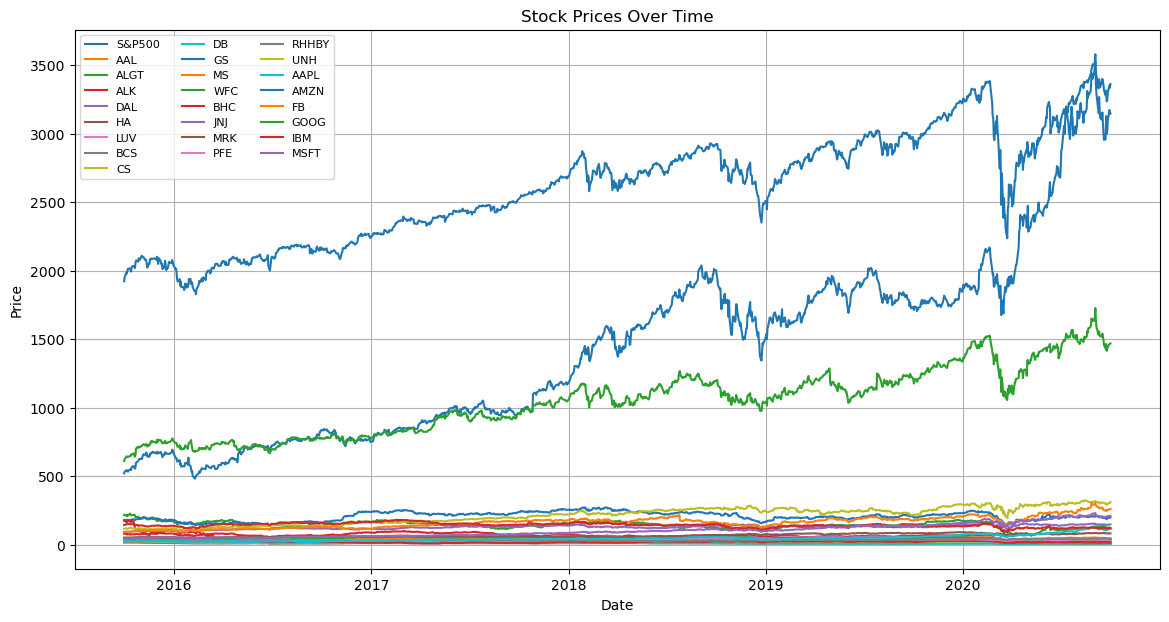

In [36]:
#Actual Prices
plt.figure(figsize=(14,7))
for column in merged_data.columns:
    plt.plot(merged_data.index, merged_data[column], label=column)

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc='upper left', ncol=3, fontsize=8)
plt.grid(True)
plt.show()

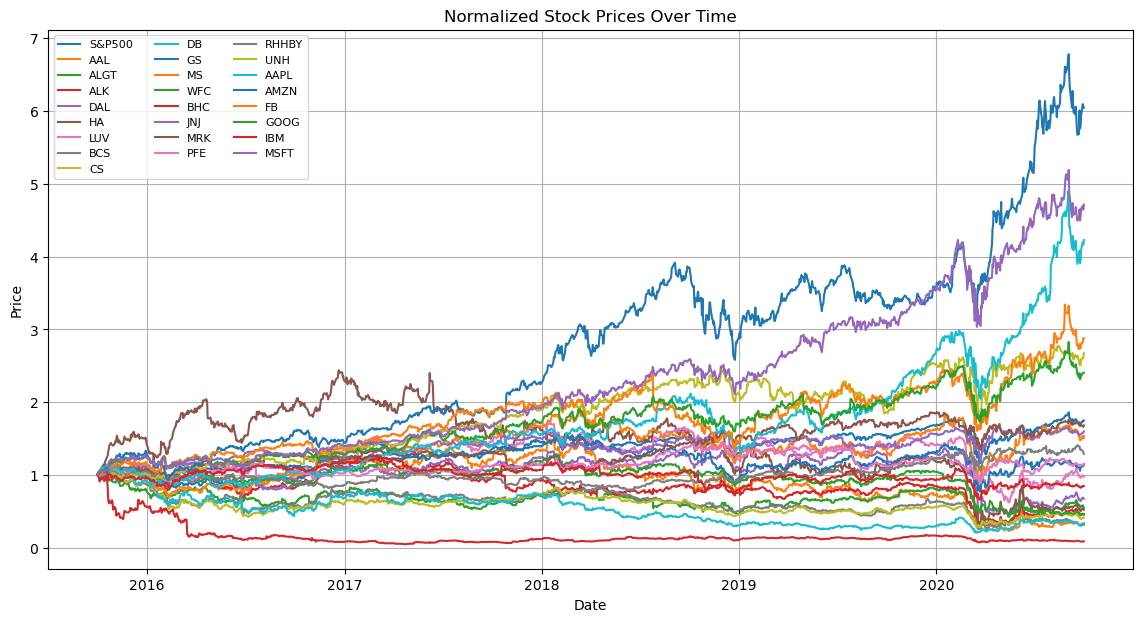

In [37]:
#Normalized Prices
plt.figure(figsize=(14,7))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

plt.title("Normalized Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc='upper left', ncol=3, fontsize=8)
plt.grid(True)
plt.show()

Based on the above charts, we can draw some conclusions
- Amazon and Google show a clear upward trend
- Compared to S&P 500, we have a number of stocks that have performed better

#### Sector Exploration

Aviation

In [41]:
Aviation=normalized_data[['S&P500','ALGT','AAL','ALK','DAL','HA','LUV']]
Aviation.head()

S&P500      ALGT       AAL       ALK       DAL        HA  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.014315  0.989036  0.985459  0.987910  0.988108  0.981804   
2015-10-05  1.032867  0.991192  1.025255  1.008476  1.034133  1.031136   
2015-10-06  1.029161  0.956969  0.972704  0.928954  0.992953  0.980590   
2015-10-07  1.037431  0.981007  1.002806  0.946903  1.012773  0.993126   

                 LUV  
Date                  
2015-10-01  1.000000  
2015-10-02  0.999219  
2015-10-05  1.023171  
2015-10-06  0.989326  
2015-10-07  1.007810

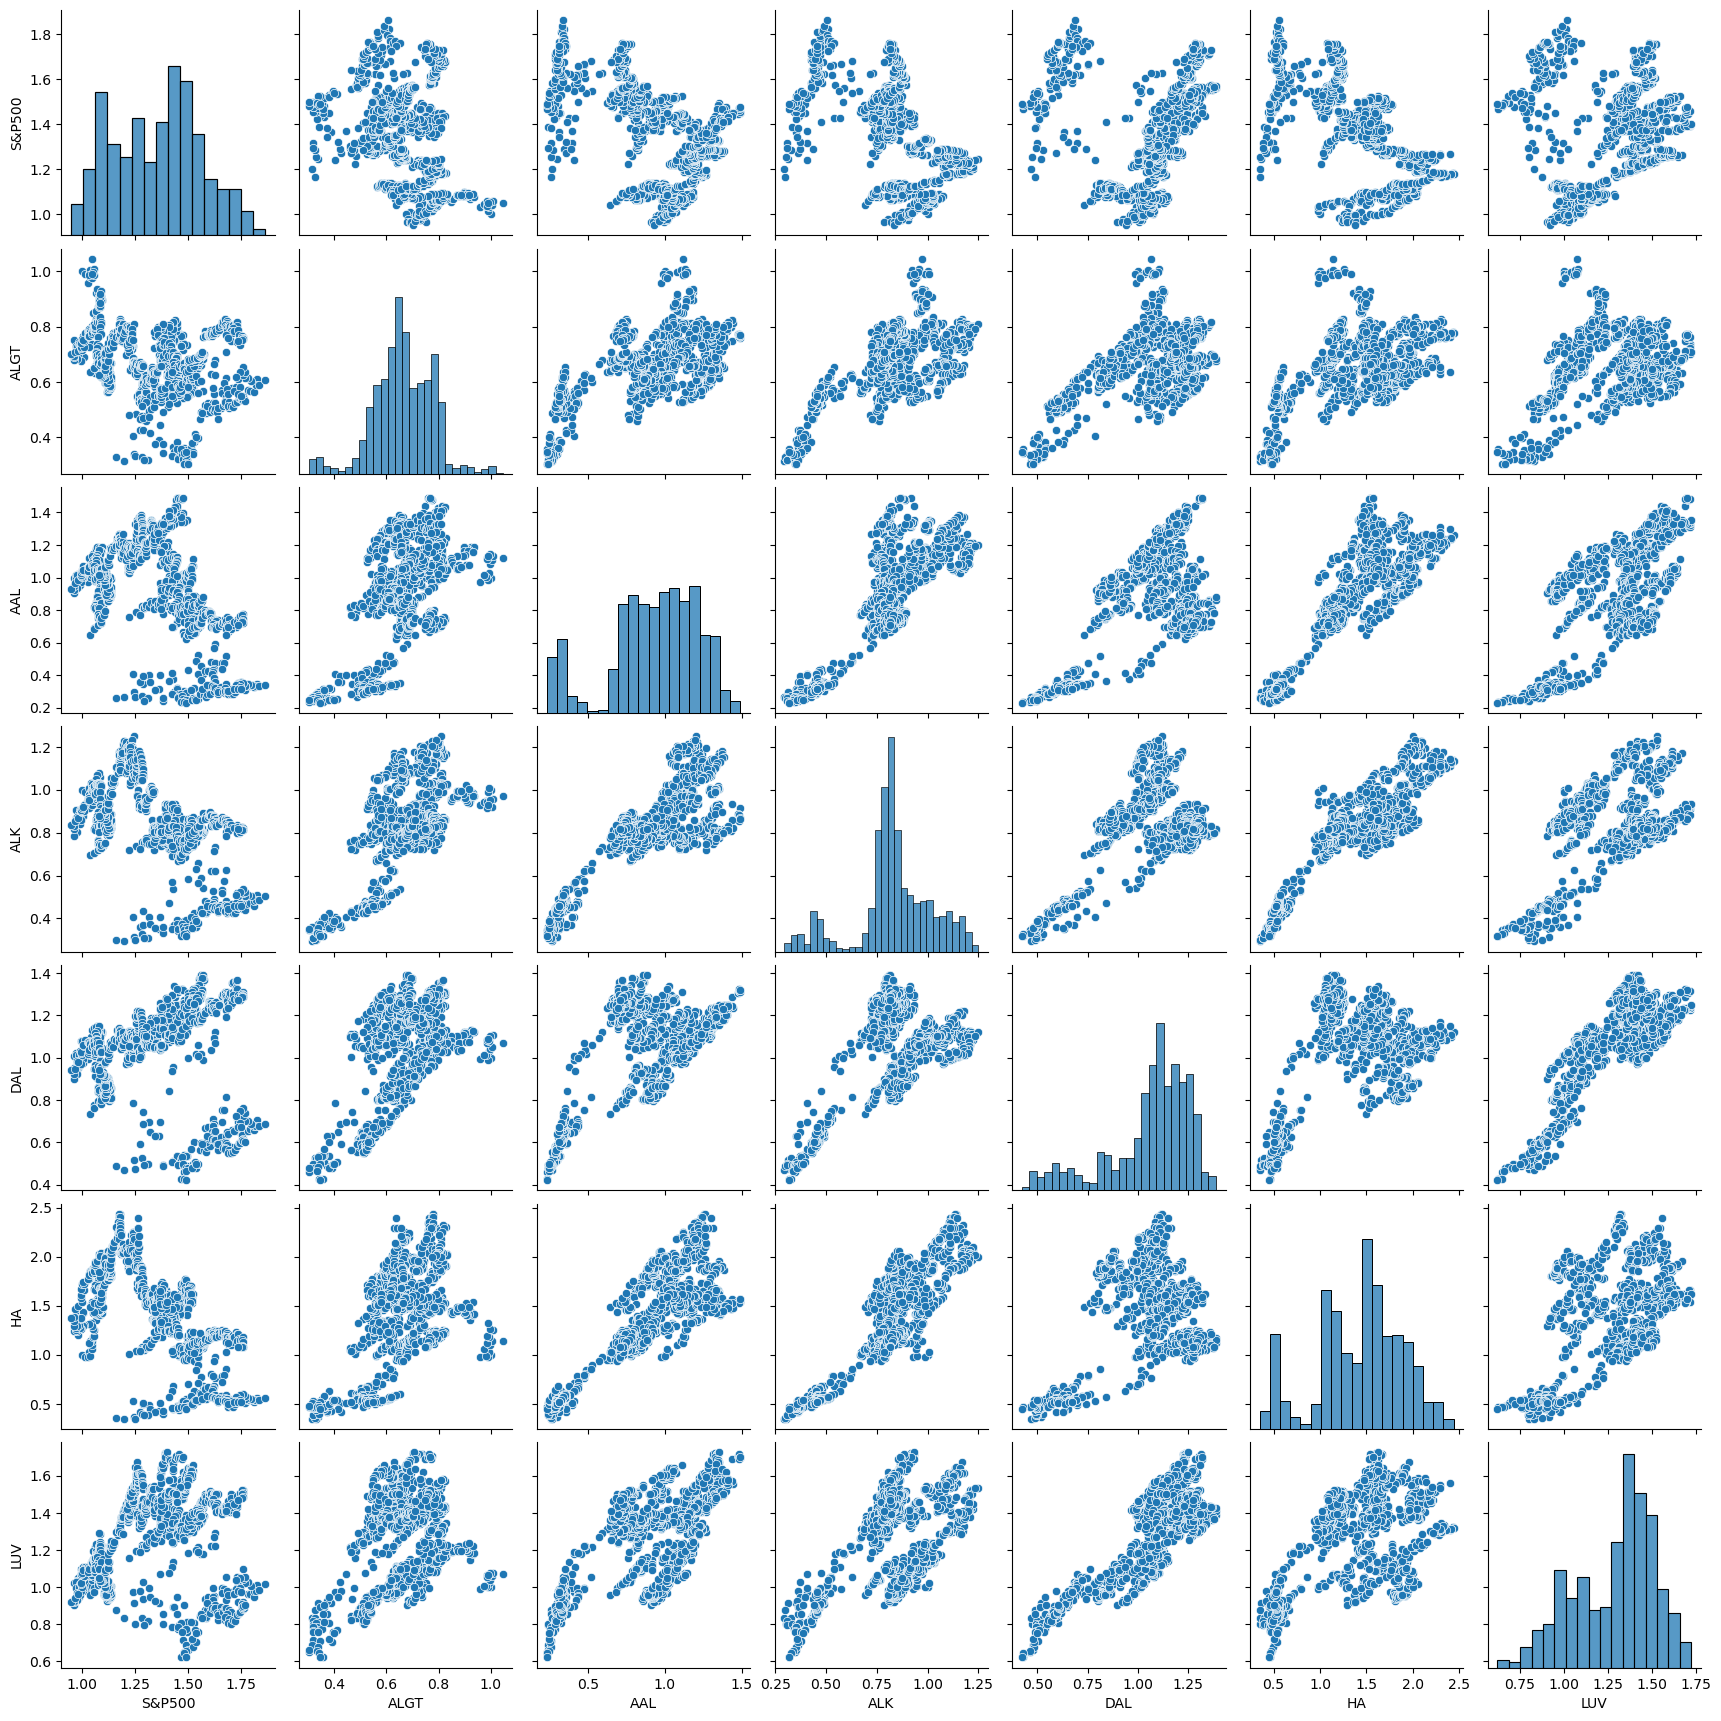

In [42]:
#Create pairplots
sns.pairplot(Aviation, kind = 'scatter')
plt.ioff()

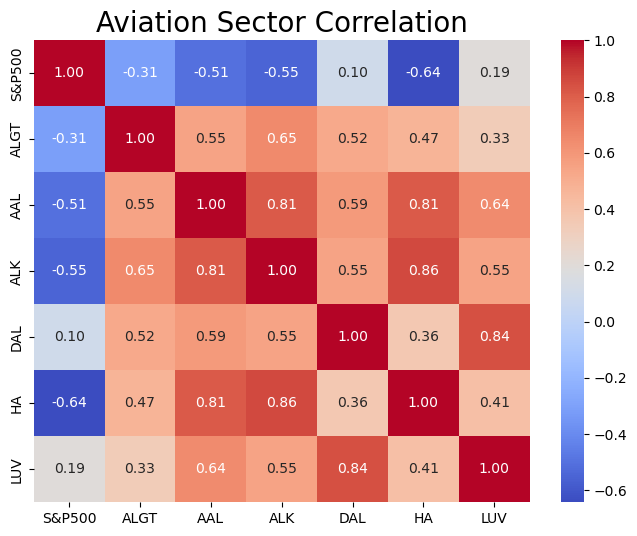

In [43]:
#Check for correlation
plt.figure(figsize=(8,6))
sns.heatmap(Aviation.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Aviation Sector Correlation', fontsize=20)
plt.show()

#### Finance

In [45]:
Finance = normalized_data[['S&P500','BCS','CS','DB','GS','MS','WFC']]
Finance.head()

S&P500       BCS        CS        DB        GS        MS  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.014315  1.025316  1.022831  1.023379  1.005624  0.997778   
2015-10-05  1.032867  1.039307  1.044417  1.063348  1.026588  1.025079   
2015-10-06  1.029161  1.035976  1.053549  1.070890  1.024429  1.027302   
2015-10-07  1.037431  1.047968  1.051059  1.085596  1.035280  1.045397   

                 WFC  
Date                  
2015-10-01  1.000000  
2015-10-02  0.996501  
2015-10-05  1.018857  
2015-10-06  1.011470  
2015-10-07  1.014580

In [46]:
#Create pairplots
sns.pairplot(Finance, kind = 'scatter')
plt.ioff()

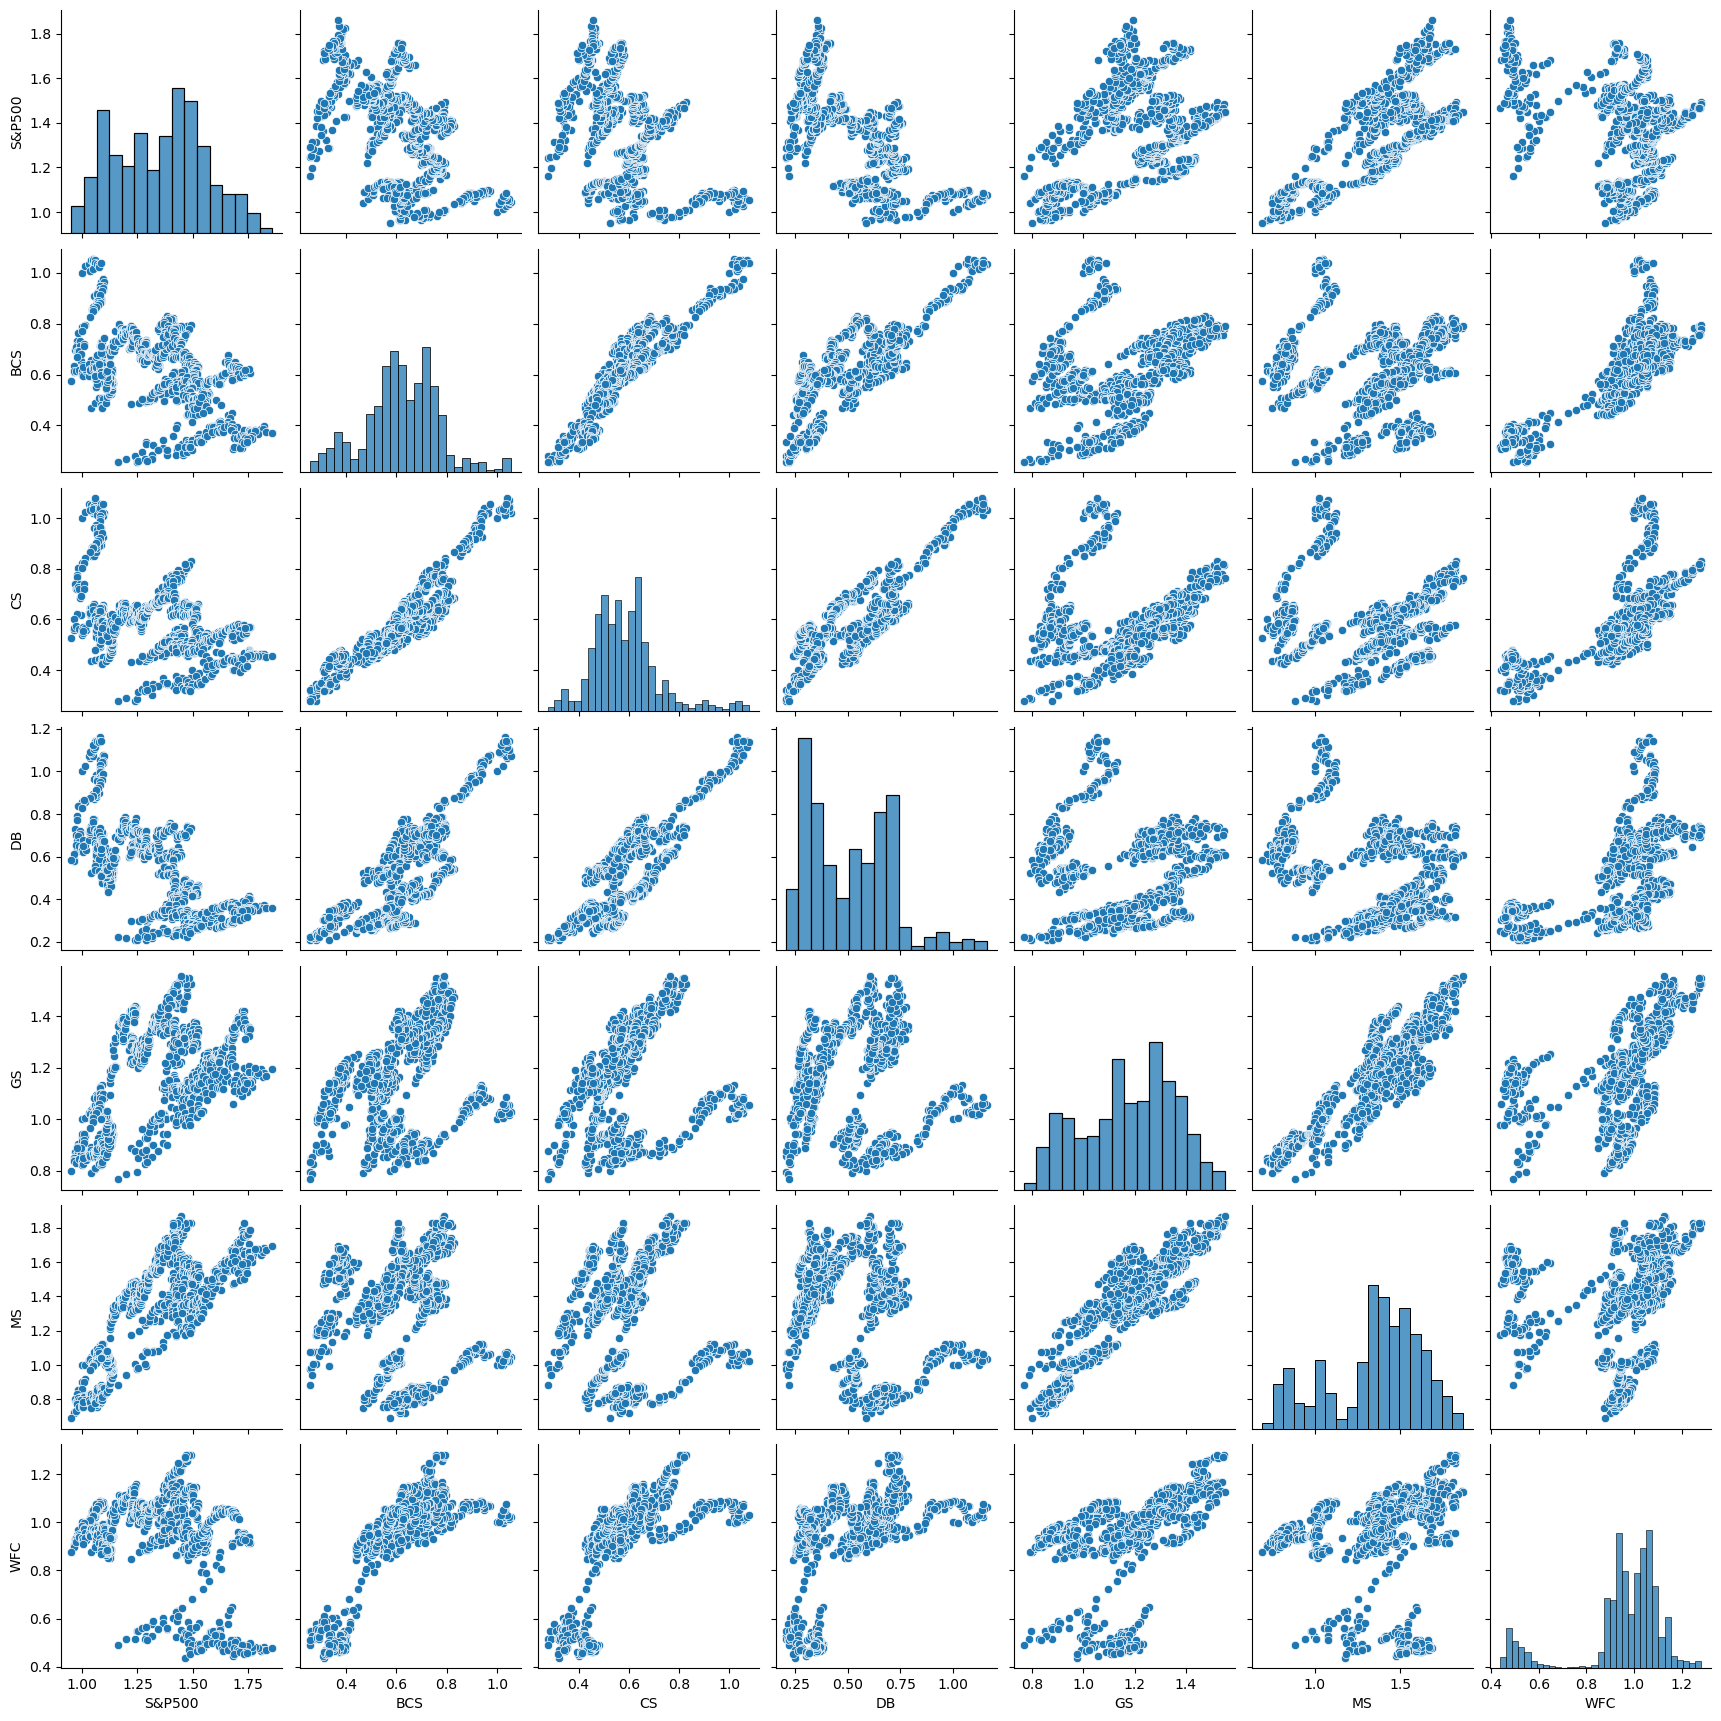

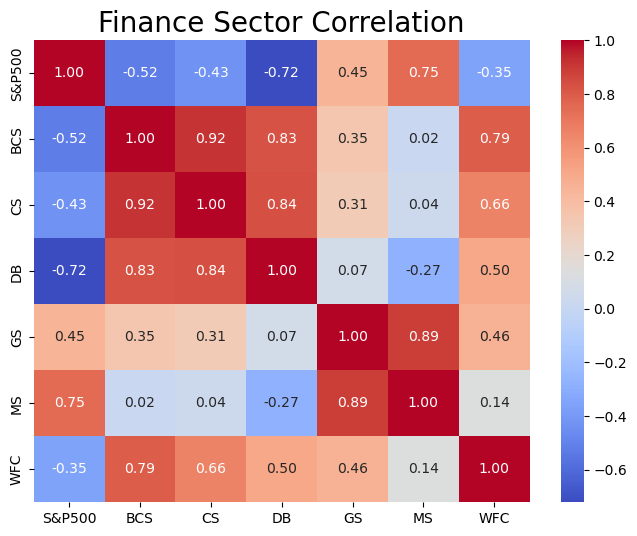

In [47]:
#Check for correlation
plt.figure(figsize=(8,6))
sns.heatmap(Finance.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Finance Sector Correlation', fontsize=20)
plt.show()

#### Pharma/Healthcare

In [49]:
Pharma = normalized_data[['S&P500','BHC','JNJ','MRK','PFE','RHHBY','UNH']]
Pharma.head()

S&P500       BHC       JNJ       MRK       PFE     RHHBY  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.014315  1.015145  1.008157  1.015597  1.038945  1.003010   
2015-10-05  1.032867  0.910134  1.017066  1.037675  1.051508  1.006622   
2015-10-06  1.029161  0.924276  1.002683  1.008710  1.029837  1.009332   
2015-10-07  1.037431  0.945601  1.019427  1.032003  1.045540  0.979831   

                 UNH  
Date                  
2015-10-01  1.000000  
2015-10-02  1.019038  
2015-10-05  1.026070  
2015-10-06  0.995198  
2015-10-07  0.998456

In [50]:
#Create pairplots
sns.pairplot(Pharma, kind = 'scatter')
plt.ioff()

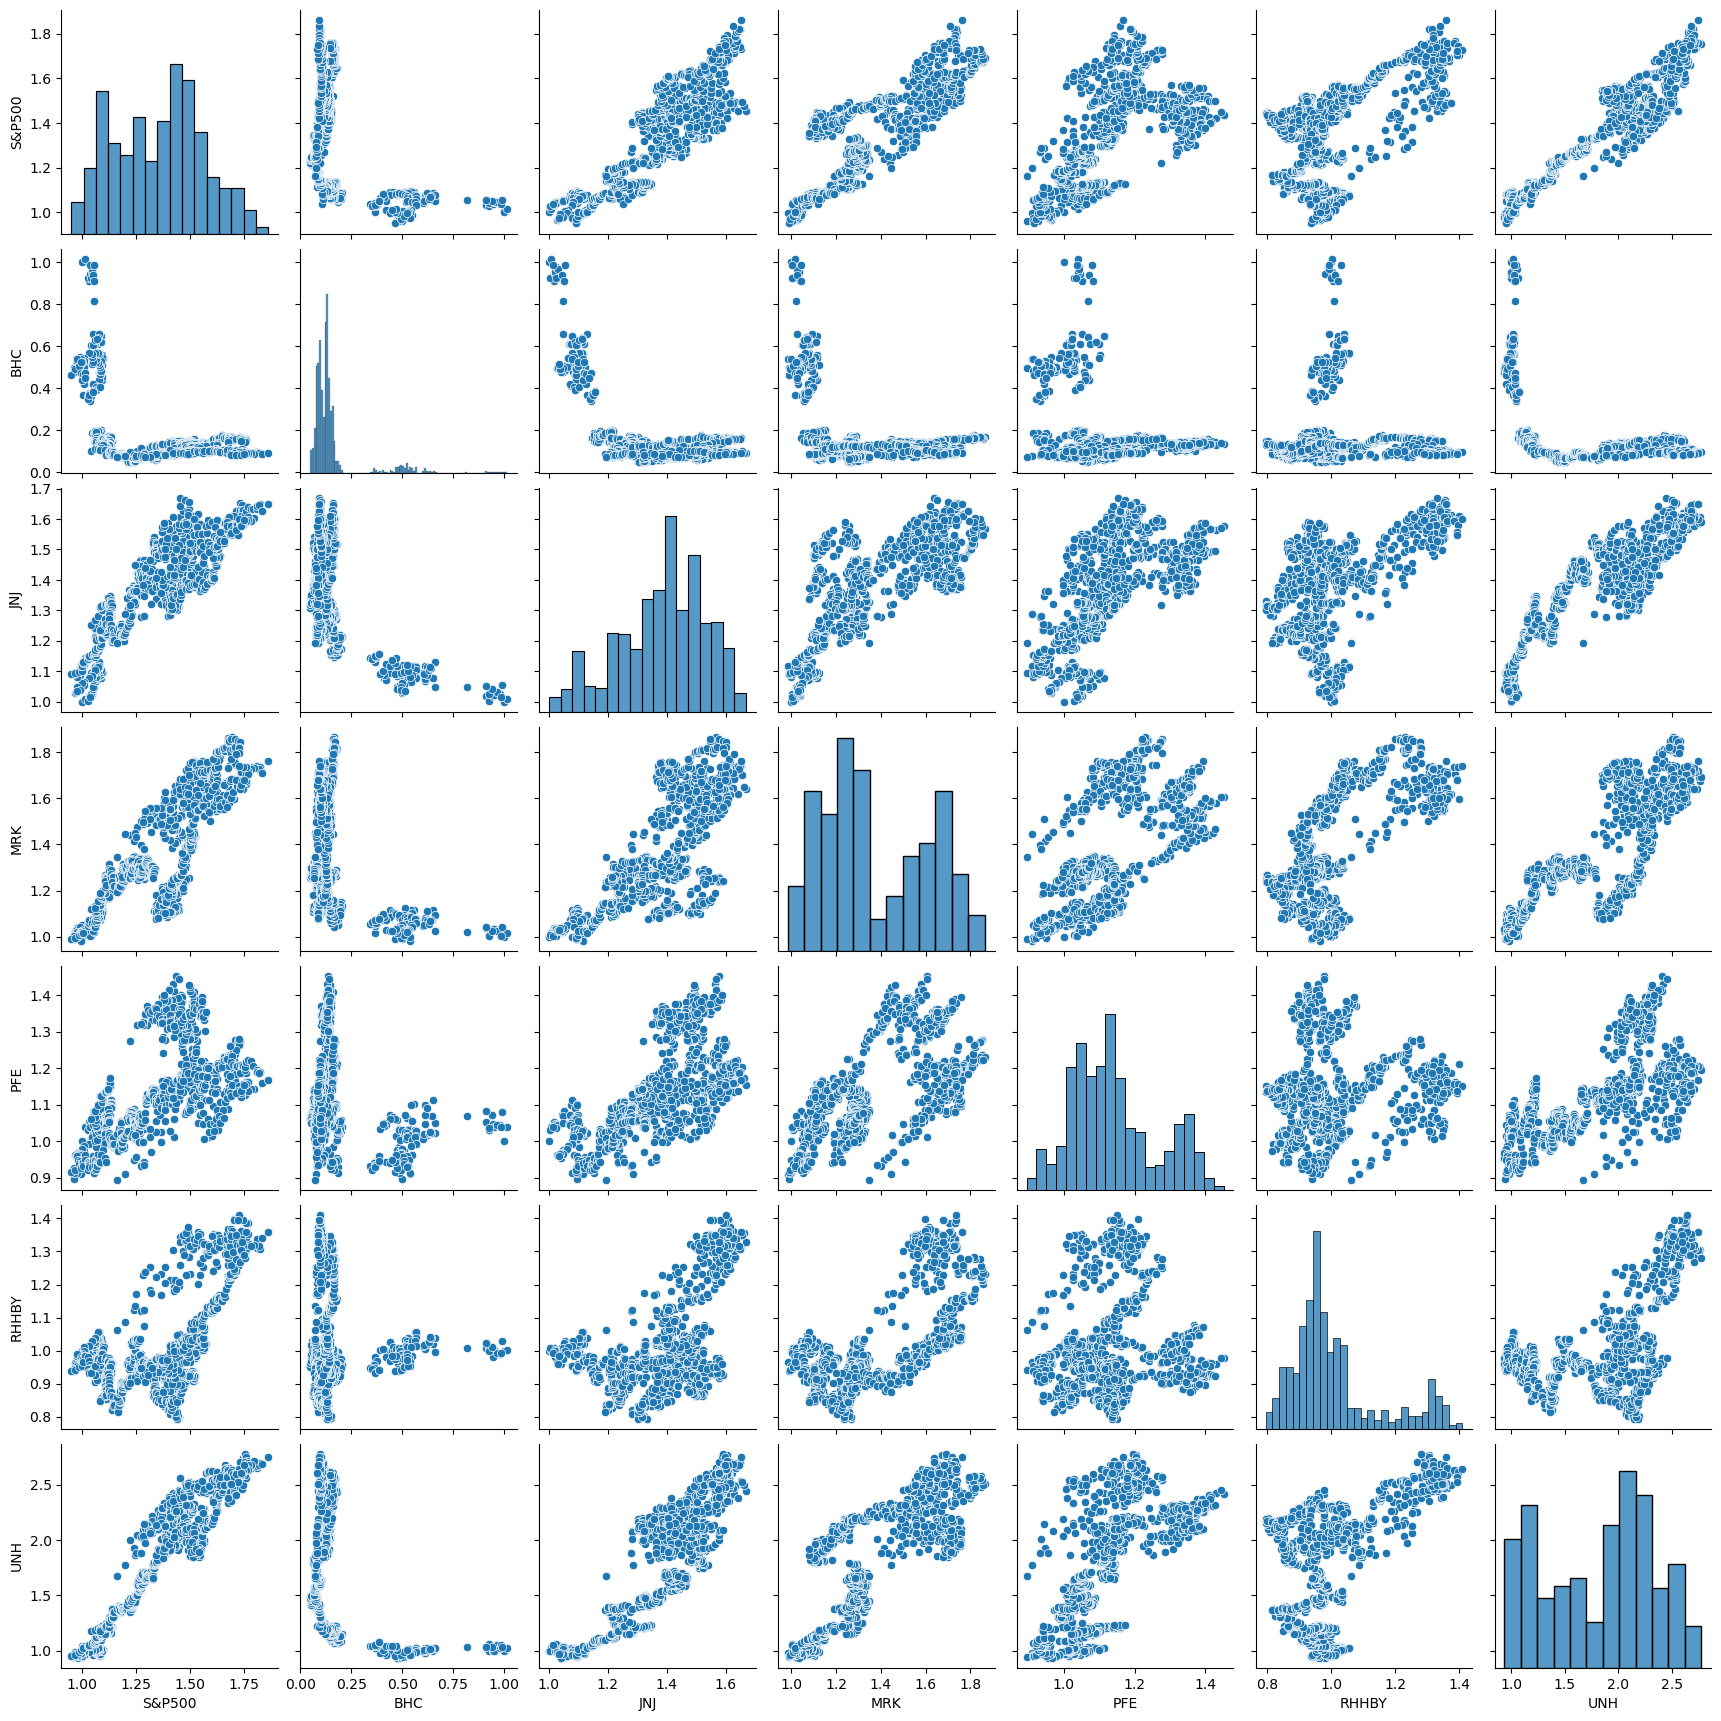

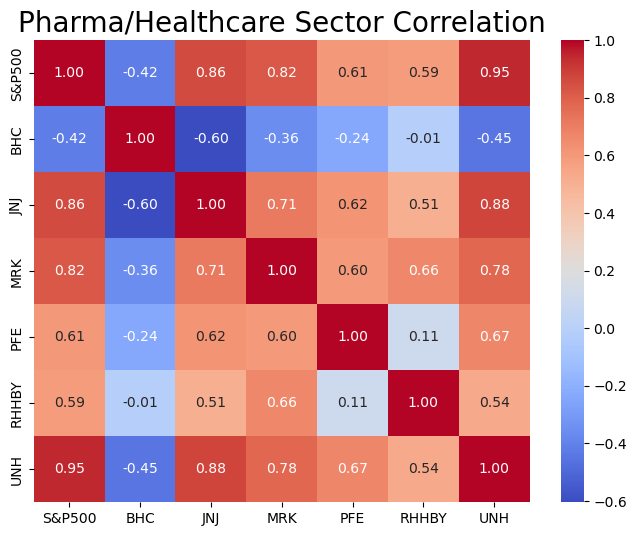

In [51]:
#Check for correlation
plt.figure(figsize=(8,6))
sns.heatmap(Pharma.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Pharma/Healthcare Sector Correlation', fontsize=20)
plt.show()

#### Technology

In [53]:
Tech = normalized_data[['S&P500','AAPL','AMZN','FB','GOOG','IBM','MSFT']]
Tech.head()

S&P500      AAPL      AMZN        FB      GOOG       IBM  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.014315  1.007301  1.022699  1.012314  1.025553  1.006895   
2015-10-05  1.032867  1.010951  1.044093  1.033645  1.049371  1.037955   
2015-10-06  1.029161  1.015788  1.032186  1.020341  1.055866  1.036145   
2015-10-07  1.037431  1.010951  1.040751  1.015943  1.050827  1.045268   

                MSFT  
Date                  
2015-10-01  1.000000  
2015-10-02  1.021520  
2015-10-05  1.045281  
2015-10-06  1.047971  
2015-10-07  1.049092

In [54]:
#Create pairplots
sns.pairplot(Tech, kind = 'scatter')
plt.ioff()

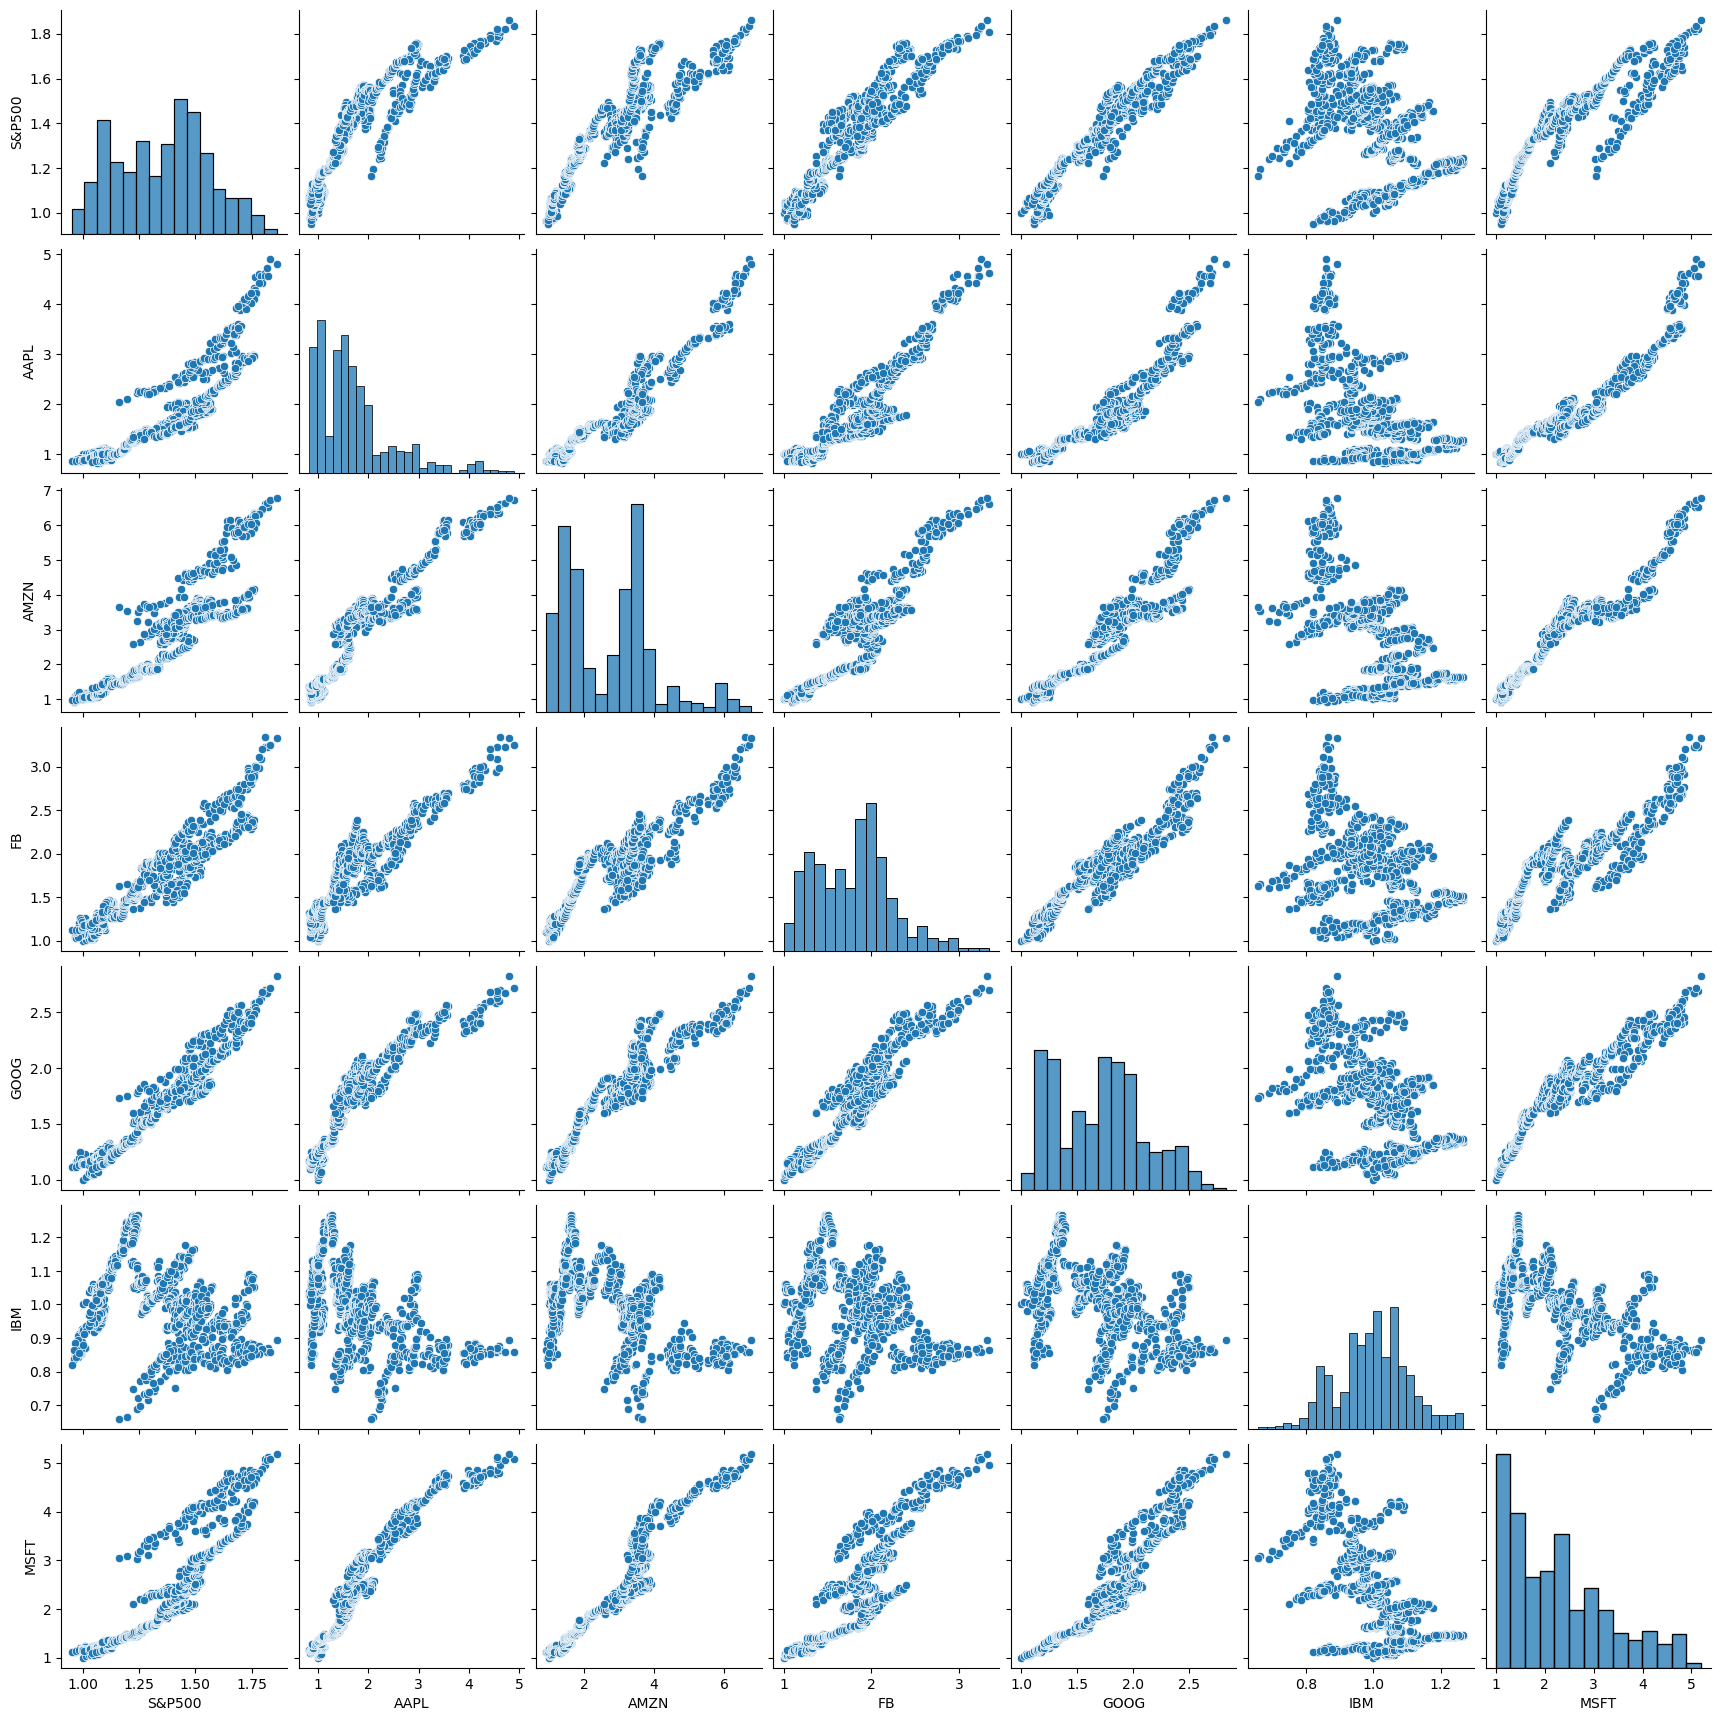

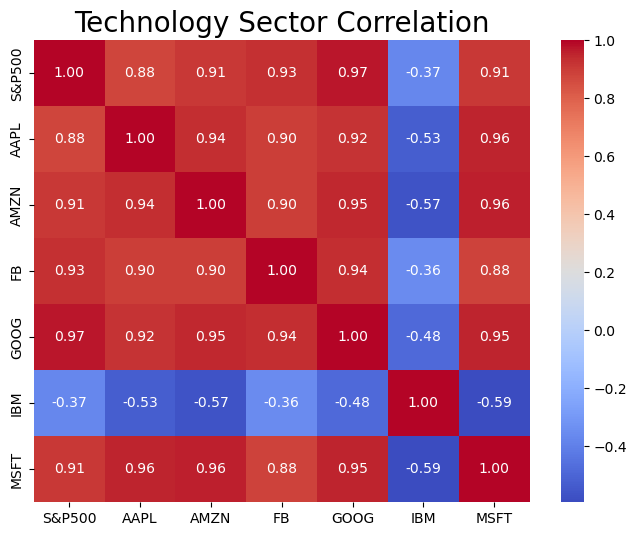

In [55]:
#Check for correlation
plt.figure(figsize=(8,6))
sns.heatmap(Tech.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Technology Sector Correlation', fontsize=20)
plt.show()

So reviewing all the above sectors vs S&P 500:
- Aviation has a negative correlation with S&P 500
- Finance does not have a clear positive or negative correlation
- Pharma/Healthcare has a positive correlation with S&P 500
- Technology has a positive correlation with S&P 500

#### Calculating Daily Returns

In [58]:
daily_returns = merged_data.copy()

for i in list(merged_data.columns):
    daily_returns[i]=daily_returns[i].pct_change(1)

daily_returns = daily_returns*100
daily_returns.head()

S&P500       AAL      ALGT       ALK       DAL        HA  \
Date                                                                     
2015-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2015-10-02  1.431529 -1.454082 -1.096431 -1.209025 -1.189168 -1.819648   
2015-10-05  1.828984  4.038307  0.218007  2.081759  4.657901  5.024707   
2015-10-06 -0.358824 -5.125648 -3.452741 -7.885310 -3.982110 -4.901961   
2015-10-07  0.803563  3.094676  2.511980  1.932111  1.996012  1.278346   

                 LUV       BCS        CS        DB  ...       MRK       PFE  \
Date                                                ...                       
2015-10-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2015-10-02 -0.078102  2.531646  2.283101  2.337854  ...  1.559652  3.894479   
2015-10-05  2.397077  1.364522  2.110394  3.905682  ...  2.173915  1.209184   
2015-10-06 -3.307886 -0.320513  0.874400  0.709216  ... -2.791335 -2.060929   
2015-10-07  1.868418  1.157556 -0.236403  1.373243  ...  2.309241  1.524855   

               RHHBY       UNH      AAPL      AMZN        FB      GOOG  \
Date                                                                     
2015-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2015-10-02  0.301020  1.903783  0.730057  2.269935  1.231449  2.555251   
2015-10-05  0.360141  0.690061  0.362388  2.091865  2.107095  2.322502   
2015-10-06  0.269139 -3.008775  0.478422 -1.140379 -1.287096  0.618896   
2015-10-07 -2.922756  0.327442 -0.476144  0.829802 -0.431036 -0.477196   

                 IBM      MSFT  
Date                            
2015-10-01       NaN       NaN  
2015-10-02  0.689467  2.151982  
2015-10-05  3.084791  2.326094  
2015-10-06 -0.174446  0.257343  
2015-10-07  0.880493  0.106950  

[5 rows x 25 columns]

In [59]:
daily_returns.to_csv('daily_returns.csv')

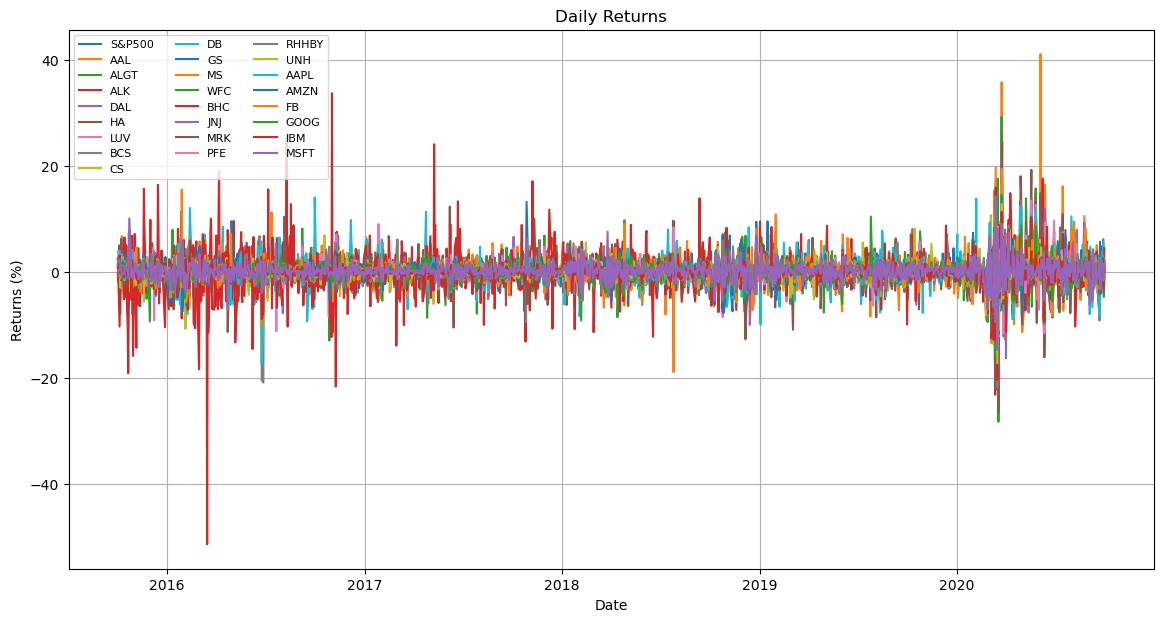

In [60]:
#Visualizing Daily Returns
plt.figure(figsize=(14,7))
for column in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[column], label=column)

plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.legend(loc='upper left', ncol=3, fontsize=8)
plt.grid(True)
plt.show()

#### Average Daily Returns and Risk

In [62]:
# Calculating average daily returns, risk
Metrics = daily_returns.describe().T
Metrics.head()

count      mean       std        min       25%       50%       75%  \
S&P500  1258.0  0.051749  1.208006 -11.984055 -0.293825  0.068194  0.521338   
AAL     1258.0 -0.033611  3.472483 -25.224647 -1.362281 -0.047980  1.323266   
ALGT    1258.0 -0.004708  2.910086 -28.329955 -1.130513 -0.036298  1.163001   
ALK     1258.0 -0.025574  2.690691 -23.238509 -1.072065  0.020551  1.061863   
DAL     1258.0  0.004181  2.647807 -25.992439 -0.971384  0.078274  0.978083   

              max  
S&P500   9.382774  
AAL     41.097038  
ALGT    29.242785  
ALK     20.307943  
DAL     21.017103

In [63]:
#Rename columns
Metrics.rename(columns = {'mean' :'Avg Daily Returns', 'std':'Risk', 'min':'Minimum', 'max':'Maximum'}, inplace=True)
Metrics

count  Avg Daily Returns      Risk    Minimum       25%       50%  \
S&P500  1258.0           0.051749  1.208006 -11.984055 -0.293825  0.068194   
AAL     1258.0          -0.033611  3.472483 -25.224647 -1.362281 -0.047980   
ALGT    1258.0          -0.004708  2.910086 -28.329955 -1.130513 -0.036298   
ALK     1258.0          -0.025574  2.690691 -23.238509 -1.072065  0.020551   
DAL     1258.0           0.004181  2.647807 -25.992439 -0.971384  0.078274   
HA      1258.0           0.003424  3.313174 -26.497129 -1.490796  0.034182   
LUV     1258.0           0.024460  2.291330 -15.109442 -0.922203  0.061752   
BCS     1258.0          -0.054837  2.511873 -21.851852 -1.078669  0.000000   
CS      1258.0          -0.043672  2.284161 -18.259804 -1.044225  0.000000   
DB      1258.0          -0.052886  2.774288 -17.488789 -1.497620 -0.105097   
GS      1258.0           0.030334  1.989900 -12.705308 -0.838624  0.029898   
MS      1258.0           0.057752  2.180951 -15.600000 -0.902312  0.044479   
WFC     1258.0          -0.041431  2.034942 -15.867617 -0.791701 -0.036228   
BHC     1258.0          -0.089683  4.455074 -51.462924 -1.967809 -0.050130   
JNJ     1258.0           0.045050  1.245905 -10.037876 -0.427706  0.049315   
MRK     1258.0           0.051124  1.406695  -8.899025 -0.623984  0.024504   
PFE     1258.0           0.020852  1.382614  -7.734635 -0.585647  0.011537   
RHHBY   1258.0           0.029271  1.351412  -8.960935 -0.623653  0.022948   
UNH     1258.0           0.094126  1.781039 -17.276876 -0.664425  0.080905   
AAPL    1258.0           0.132215  1.872922 -12.864695 -0.617850  0.095143   
AMZN    1258.0           0.161053  1.896856  -7.922081 -0.671575  0.163601   
FB      1258.0           0.104970  2.035420 -18.960922 -0.722265  0.119318   
GOOG    1258.0           0.083410  1.652039 -11.100820 -0.578831  0.097265   
IBM     1258.0          -0.000172  1.608610 -12.850727 -0.649782  0.048255   
MSFT    1258.0           0.138704  1.753947 -14.739031 -0.589349  0.122465   

             75%    Maximum  
S&P500  0.521338   9.382774  
AAL     1.323266  41.097038  
ALGT    1.163001  29.242785  
ALK     1.061863  20.307943  
DAL     0.978083  21.017103  
HA      1.507790  24.583741  
LUV     0.998995  14.444134  
BCS     1.021452  15.104167  
CS      1.041596  16.344725  
DB      1.387203  14.024390  
GS      0.970448  17.580307  
MS      1.045051  19.770045  
WFC     0.758904  14.534653  
BHC     1.802160  33.744400  
JNJ     0.592123   7.997719  
MRK     0.761626  10.408024  
PFE     0.637178   8.960690  
RHHBY   0.691940  13.011775  
UNH     0.816089  12.798934  
AAPL    0.991069  11.980826  
AMZN    1.076492  13.216371  
FB      1.088035  15.521445  
GOOG    0.878510  10.448543  
IBM     0.687851  11.301051  
MSFT    0.916106  14.216888

In [64]:
#Drop unneeded columns
Metrics = Metrics.drop(['count', '25%', '50%', '75%'], axis = 1)
Metrics

Avg Daily Returns      Risk    Minimum    Maximum
S&P500           0.051749  1.208006 -11.984055   9.382774
AAL             -0.033611  3.472483 -25.224647  41.097038
ALGT            -0.004708  2.910086 -28.329955  29.242785
ALK             -0.025574  2.690691 -23.238509  20.307943
DAL              0.004181  2.647807 -25.992439  21.017103
HA               0.003424  3.313174 -26.497129  24.583741
LUV              0.024460  2.291330 -15.109442  14.444134
BCS             -0.054837  2.511873 -21.851852  15.104167
CS              -0.043672  2.284161 -18.259804  16.344725
DB              -0.052886  2.774288 -17.488789  14.024390
GS               0.030334  1.989900 -12.705308  17.580307
MS               0.057752  2.180951 -15.600000  19.770045
WFC             -0.041431  2.034942 -15.867617  14.534653
BHC             -0.089683  4.455074 -51.462924  33.744400
JNJ              0.045050  1.245905 -10.037876   7.997719
MRK              0.051124  1.406695  -8.899025  10.408024
PFE              0.020852  1.382614  -7.734635   8.960690
RHHBY            0.029271  1.351412  -8.960935  13.011775
UNH              0.094126  1.781039 -17.276876  12.798934
AAPL             0.132215  1.872922 -12.864695  11.980826
AMZN             0.161053  1.896856  -7.922081  13.216371
FB               0.104970  2.035420 -18.960922  15.521445
GOOG             0.083410  1.652039 -11.100820  10.448543
IBM             -0.000172  1.608610 -12.850727  11.301051
MSFT             0.138704  1.753947 -14.739031  14.216888

Based on above data, 9 stocks have negative Avg Daily Returns

#### Stock Price (Daily Return) Dispersion from mean

In [67]:
#Calculate mean and dispersion
mean_returns = daily_returns.mean()
deviation = daily_returns - mean_returns

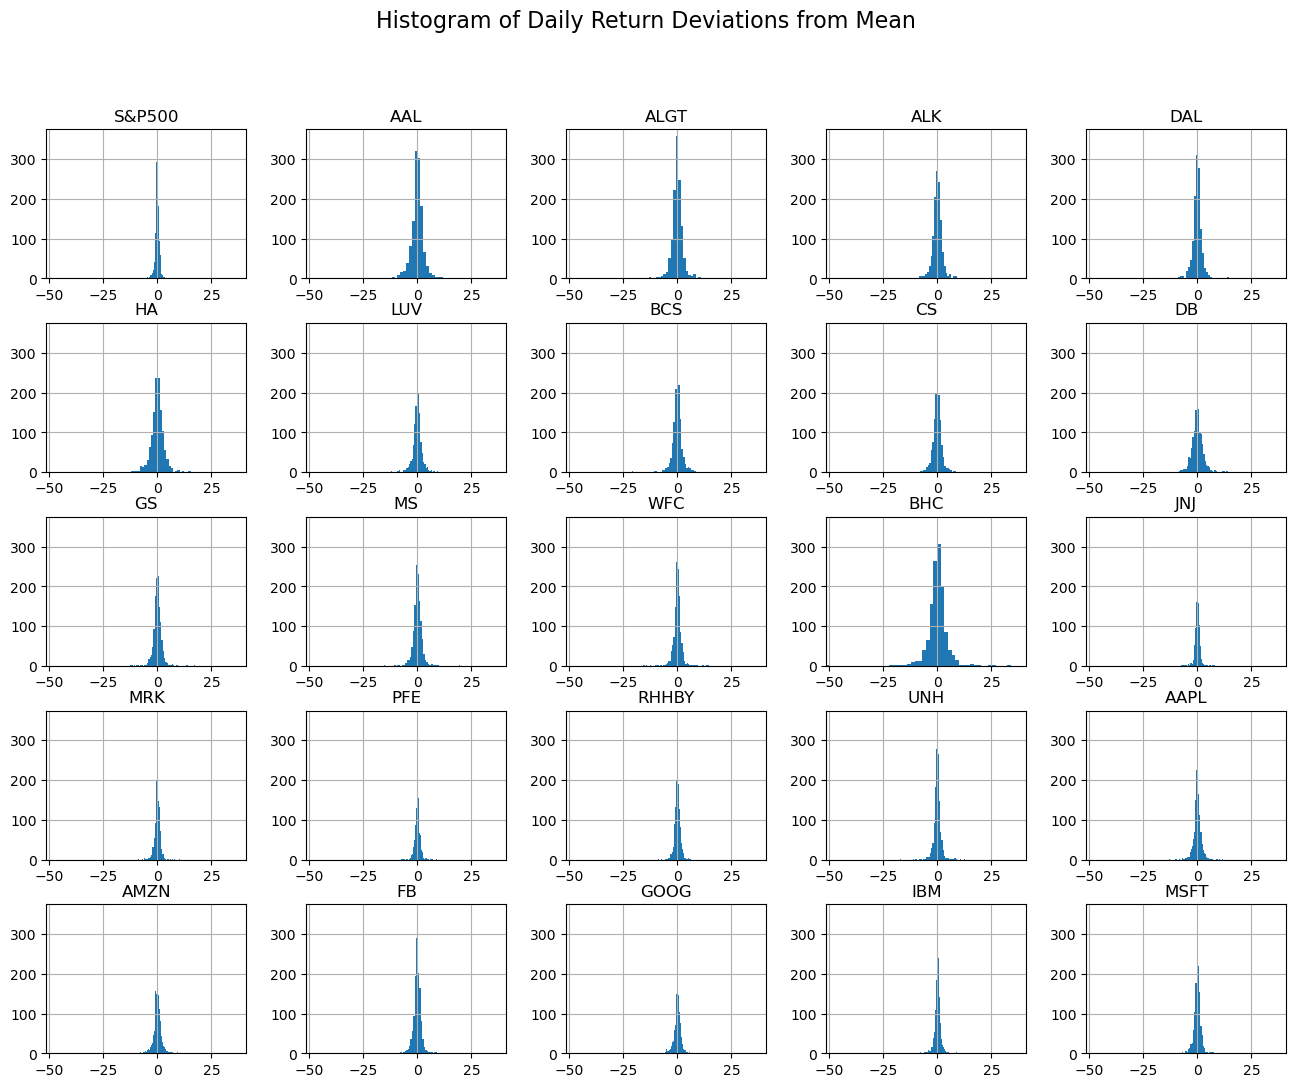

In [68]:
#Plot dispersion chart for each stock
#deviation.hist(figsize=(16,12), bins=50, layout=(5,5))
#plt.suptitle("Histogram of Daily Return Deviations from Mean", fontsize=16)
axes = deviation.hist(figsize=(16,12), bins=50, layout=(5,5))
axes = axes.flatten()
x_min = deviation.min().min()
x_max = deviation.max().max()
y_max = max(ax.get_ylim()[1] for ax in axes)

for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)


plt.suptitle("Histogram of Daily Return Deviations from Mean", fontsize=16)
plt.show()

Higher dispersion indicates higher risk as fluctuations are more

#### Correlation of Daily Returns

In [71]:
stock_correlations = daily_returns.corr(method='pearson')

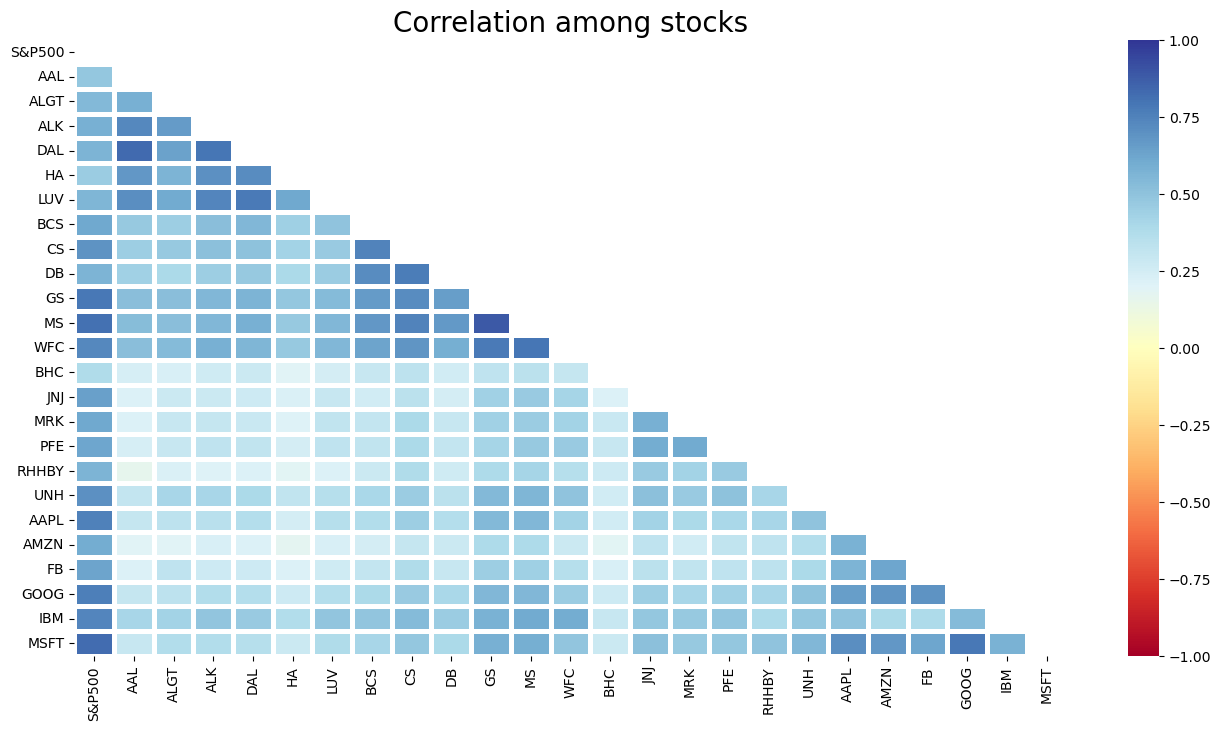

In [72]:
plt.figure(figsize=(16,8))
mask = np.zeros_like(stock_correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(stock_correlations, cmap='RdYlBu', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.title('Correlation among stocks', fontsize = 20)
plt.show()

As expected, stocks belonging to the same industry have a higher correlation with each other

#### Additional metrics needed

In [75]:
#Annualized returns, annualized risk and cumulative returns, assuming 252 trading days in a year
Metrics['Annualized Returns'] = Metrics['Avg Daily Returns']*252
Metrics['Annualized Risk'] = Metrics['Risk']*(252**0.5)

In [76]:
#Cumulative Returns
first = merged_data.iloc[0]
last = merged_data.iloc[-1]
cum_returns = (last-first)/first*100
Metrics['Cumulative Returns']= cum_returns

In [77]:
Metrics

Avg Daily Returns      Risk    Minimum    Maximum  Annualized Returns  \
S&P500           0.051749  1.208006 -11.984055   9.382774           13.040656   
AAL             -0.033611  3.472483 -25.224647  41.097038           -8.470057   
ALGT            -0.004708  2.910086 -28.329955  29.242785           -1.186343   
ALK             -0.025574  2.690691 -23.238509  20.307943           -6.444588   
DAL              0.004181  2.647807 -25.992439  21.017103            1.053570   
HA               0.003424  3.313174 -26.497129  24.583741            0.862866   
LUV              0.024460  2.291330 -15.109442  14.444134            6.163837   
BCS             -0.054837  2.511873 -21.851852  15.104167          -13.819019   
CS              -0.043672  2.284161 -18.259804  16.344725          -11.005358   
DB              -0.052886  2.774288 -17.488789  14.024390          -13.327353   
GS               0.030334  1.989900 -12.705308  17.580307            7.644200   
MS               0.057752  2.180951 -15.600000  19.770045           14.553615   
WFC             -0.041431  2.034942 -15.867617  14.534653          -10.440560   
BHC             -0.089683  4.455074 -51.462924  33.744400          -22.600018   
JNJ              0.045050  1.245905 -10.037876   7.997719           11.352656   
MRK              0.051124  1.406695  -8.899025  10.408024           12.883185   
PFE              0.020852  1.382614  -7.734635   8.960690            5.254808   
RHHBY            0.029271  1.351412  -8.960935  13.011775            7.376346   
UNH              0.094126  1.781039 -17.276876  12.798934           23.719727   
AAPL             0.132215  1.872922 -12.864695  11.980826           33.318190   
AMZN             0.161053  1.896856  -7.922081  13.216371           40.585455   
FB               0.104970  2.035420 -18.960922  15.521445           26.452355   
GOOG             0.083410  1.652039 -11.100820  10.448543           21.019428   
IBM             -0.000172  1.608610 -12.850727  11.301051           -0.043284   
MSFT             0.138704  1.753947 -14.739031  14.216888           34.953498   

        Annualized Risk  Cumulative Returns  
S&P500        19.176501           74.808459  
AAL           55.123957          -68.647960  
ALGT          46.196183          -45.040827  
ALK           42.713402          -54.343762  
DAL           42.032636          -32.658005  
HA            52.595001          -47.877072  
LUV           36.373735           -2.369175  
BCS           39.874742          -66.622252  
CS            36.259932          -58.613533  
DB            44.040452          -68.325792  
GS            31.588685           14.174524  
MS            34.621529           53.492057  
WFC           32.303698          -54.296267  
BHC           70.722113          -91.347439  
JNJ           19.778133           59.793934  
MRK           22.330584           68.017012  
PFE           21.948310           15.263822  
RHHBY         21.452996           28.868151  
UNH           28.273114          167.361278  
AAPL          29.731721          322.741369  
AMZN          30.111660          504.687770  
FB            32.311293          187.960421  
GOOG          26.225301          140.409630  
IBM           25.535898          -15.265686  
MSFT          27.843048          371.486208

In [78]:
# Calculating the Sharpe ratio or the risk adjusted returns
Risk_free_rate = 0.75
Metrics["Sharpe ratio"] = (Metrics['Annualized Returns'] - Risk_free_rate)/Metrics['Annualized Risk']
Metrics

Avg Daily Returns      Risk    Minimum    Maximum  Annualized Returns  \
S&P500           0.051749  1.208006 -11.984055   9.382774           13.040656   
AAL             -0.033611  3.472483 -25.224647  41.097038           -8.470057   
ALGT            -0.004708  2.910086 -28.329955  29.242785           -1.186343   
ALK             -0.025574  2.690691 -23.238509  20.307943           -6.444588   
DAL              0.004181  2.647807 -25.992439  21.017103            1.053570   
HA               0.003424  3.313174 -26.497129  24.583741            0.862866   
LUV              0.024460  2.291330 -15.109442  14.444134            6.163837   
BCS             -0.054837  2.511873 -21.851852  15.104167          -13.819019   
CS              -0.043672  2.284161 -18.259804  16.344725          -11.005358   
DB              -0.052886  2.774288 -17.488789  14.024390          -13.327353   
GS               0.030334  1.989900 -12.705308  17.580307            7.644200   
MS               0.057752  2.180951 -15.600000  19.770045           14.553615   
WFC             -0.041431  2.034942 -15.867617  14.534653          -10.440560   
BHC             -0.089683  4.455074 -51.462924  33.744400          -22.600018   
JNJ              0.045050  1.245905 -10.037876   7.997719           11.352656   
MRK              0.051124  1.406695  -8.899025  10.408024           12.883185   
PFE              0.020852  1.382614  -7.734635   8.960690            5.254808   
RHHBY            0.029271  1.351412  -8.960935  13.011775            7.376346   
UNH              0.094126  1.781039 -17.276876  12.798934           23.719727   
AAPL             0.132215  1.872922 -12.864695  11.980826           33.318190   
AMZN             0.161053  1.896856  -7.922081  13.216371           40.585455   
FB               0.104970  2.035420 -18.960922  15.521445           26.452355   
GOOG             0.083410  1.652039 -11.100820  10.448543           21.019428   
IBM             -0.000172  1.608610 -12.850727  11.301051           -0.043284   
MSFT             0.138704  1.753947 -14.739031  14.216888           34.953498   

        Annualized Risk  Cumulative Returns  Sharpe ratio  
S&P500        19.176501           74.808459      0.640923  
AAL           55.123957          -68.647960     -0.167260  
ALGT          46.196183          -45.040827     -0.041916  
ALK           42.713402          -54.343762     -0.168439  
DAL           42.032636          -32.658005      0.007222  
HA            52.595001          -47.877072      0.002146  
LUV           36.373735           -2.369175      0.148839  
BCS           39.874742          -66.622252     -0.365370  
CS            36.259932          -58.613533     -0.324197  
DB            44.040452          -68.325792     -0.319646  
GS            31.588685           14.174524      0.218249  
MS            34.621529           53.492057      0.398700  
WFC           32.303698          -54.296267     -0.346417  
BHC           70.722113          -91.347439     -0.330166  
JNJ           19.778133           59.793934      0.536080  
MRK           22.330584           68.017012      0.543344  
PFE           21.948310           15.263822      0.205246  
RHHBY         21.452996           28.868151      0.308877  
UNH           28.273114          167.361278      0.812423  
AAPL          29.731721          322.741369      1.095402  
AMZN          30.111660          504.687770      1.322925  
FB            32.311293          187.960421      0.795460  
GOOG          26.225301          140.409630      0.772896  
IBM           25.535898          -15.265686     -0.031065  
MSFT          27.843048          371.486208      1.228439

In [79]:
Metrics.to_csv('Stock_Metrics.csv')

#### Sorting the final Metrics using Annualized Returns

In [81]:
#keep only positive returns
Final_metrics = Metrics[Metrics['Annualized Returns'] > 0]
Final_metrics = Final_metrics.sort_values(by='Annualized Returns',ascending=False)
Final_metrics

Avg Daily Returns      Risk    Minimum    Maximum  Annualized Returns  \
AMZN             0.161053  1.896856  -7.922081  13.216371           40.585455   
MSFT             0.138704  1.753947 -14.739031  14.216888           34.953498   
AAPL             0.132215  1.872922 -12.864695  11.980826           33.318190   
FB               0.104970  2.035420 -18.960922  15.521445           26.452355   
UNH              0.094126  1.781039 -17.276876  12.798934           23.719727   
GOOG             0.083410  1.652039 -11.100820  10.448543           21.019428   
MS               0.057752  2.180951 -15.600000  19.770045           14.553615   
S&P500           0.051749  1.208006 -11.984055   9.382774           13.040656   
MRK              0.051124  1.406695  -8.899025  10.408024           12.883185   
JNJ              0.045050  1.245905 -10.037876   7.997719           11.352656   
GS               0.030334  1.989900 -12.705308  17.580307            7.644200   
RHHBY            0.029271  1.351412  -8.960935  13.011775            7.376346   
LUV              0.024460  2.291330 -15.109442  14.444134            6.163837   
PFE              0.020852  1.382614  -7.734635   8.960690            5.254808   
DAL              0.004181  2.647807 -25.992439  21.017103            1.053570   
HA               0.003424  3.313174 -26.497129  24.583741            0.862866   

        Annualized Risk  Cumulative Returns  Sharpe ratio  
AMZN          30.111660          504.687770      1.322925  
MSFT          27.843048          371.486208      1.228439  
AAPL          29.731721          322.741369      1.095402  
FB            32.311293          187.960421      0.795460  
UNH           28.273114          167.361278      0.812423  
GOOG          26.225301          140.409630      0.772896  
MS            34.621529           53.492057      0.398700  
S&P500        19.176501           74.808459      0.640923  
MRK           22.330584           68.017012      0.543344  
JNJ           19.778133           59.793934      0.536080  
GS            31.588685           14.174524      0.218249  
RHHBY         21.452996           28.868151      0.308877  
LUV           36.373735           -2.369175      0.148839  
PFE           21.948310           15.263822      0.205246  
DAL           42.032636          -32.658005      0.007222  
HA            52.595001          -47.877072      0.002146

#### Final Portfolio Recommendations

#### <span style="color:blue"> Mr. Patrick Jyengar </span>
- Wants to maintain a decent standard of living post Retirement
- Has always been a conservative investor
- Wants to invest $500K in Equities
- Expects to double his investment in 5 years

In [84]:
#Sort Stocks by Risk
Final_metrics.sort_values(by='Annualized Risk')

Avg Daily Returns      Risk    Minimum    Maximum  Annualized Returns  \
S&P500           0.051749  1.208006 -11.984055   9.382774           13.040656   
JNJ              0.045050  1.245905 -10.037876   7.997719           11.352656   
RHHBY            0.029271  1.351412  -8.960935  13.011775            7.376346   
PFE              0.020852  1.382614  -7.734635   8.960690            5.254808   
MRK              0.051124  1.406695  -8.899025  10.408024           12.883185   
GOOG             0.083410  1.652039 -11.100820  10.448543           21.019428   
MSFT             0.138704  1.753947 -14.739031  14.216888           34.953498   
UNH              0.094126  1.781039 -17.276876  12.798934           23.719727   
AAPL             0.132215  1.872922 -12.864695  11.980826           33.318190   
AMZN             0.161053  1.896856  -7.922081  13.216371           40.585455   
GS               0.030334  1.989900 -12.705308  17.580307            7.644200   
FB               0.104970  2.035420 -18.960922  15.521445           26.452355   
MS               0.057752  2.180951 -15.600000  19.770045           14.553615   
LUV              0.024460  2.291330 -15.109442  14.444134            6.163837   
DAL              0.004181  2.647807 -25.992439  21.017103            1.053570   
HA               0.003424  3.313174 -26.497129  24.583741            0.862866   

        Annualized Risk  Cumulative Returns  Sharpe ratio  
S&P500        19.176501           74.808459      0.640923  
JNJ           19.778133           59.793934      0.536080  
RHHBY         21.452996           28.868151      0.308877  
PFE           21.948310           15.263822      0.205246  
MRK           22.330584           68.017012      0.543344  
GOOG          26.225301          140.409630      0.772896  
MSFT          27.843048          371.486208      1.228439  
UNH           28.273114          167.361278      0.812423  
AAPL          29.731721          322.741369      1.095402  
AMZN          30.111660          504.687770      1.322925  
GS            31.588685           14.174524      0.218249  
FB            32.311293          187.960421      0.795460  
MS            34.621529           53.492057      0.398700  
LUV           36.373735           -2.369175      0.148839  
DAL           42.032636          -32.658005      0.007222  
HA            52.595001          -47.877072      0.002146

The 5 stocks with the lowest risk are JNJ, RHHBY, PFE, MRK, and GOOG. However, PFE has a very low return, so let's exclude it. Let's try to calculate the cumulative return for next five years assuming it is the same as the past five years using various combinations.

In [86]:
# Combination 1 (JNJ, RHHBY, MRK & GOOG)
Patrick_Portfolio_1 = ['JNJ' , 'RHHBY' , 'MRK' , 'GOOG']
Patrick_Portfolio_1_Metrics = Final_metrics.loc[Patrick_Portfolio_1]
weight = np.array([0.25,0.25,0.25,0.25])
Patrick_Portfolio_1_Returns = np.sum(weight*Patrick_Portfolio_1_Metrics['Cumulative Returns'])
Patrick_Portfolio_1_Returns

74.27218167665876

Since returns are 74%, investment will not double, let us replace GOOG with a higher performing stock MSFT with slightly higher risk

In [88]:
# Combination 2 (JNJ, RHHBY, MRK & MSFT)
Patrick_Portfolio_2 = ['JNJ' , 'RHHBY' , 'MRK' , 'MSFT']
Patrick_Portfolio_2_Metrics = Final_metrics.loc[Patrick_Portfolio_2]
weights = np.array([0.25,0.25,0.25,0.25])
Patrick_Portfolio_2_Returns = np.sum(weight*Patrick_Portfolio_2_Metrics['Cumulative Returns'])
Patrick_Portfolio_2_Returns

132.0413260505485

In [89]:
#Check Portfolio Risk
Patrick_Portfolio_2_Metrics['Annualized Risk'].mean()

22.851190344097297

As we can see, adding Microsoft significantly improves the returns and achieves the goal of > 100% keeping risk limited (22%), hence we will go with this combination

#### <span style="color:blue"> Suggested Stocks for Patrick: </span>
- JNJ (Johnson & Johnson)
- RHHBY (Roche Holding AG)
- MRK (Merck and CO inc.)
- MSFT (Microsoft)

#### <span style="color:red"> Mr. Peter Jyengar</span>
- Prefers high return investments
- Can bounce back in case of losses
- Wants to invest $1 mn in high return stocks
- Expects high returns in 5 years

In [93]:
#Filter top 5 stocks with highers returns (metrics already sorted by Annualized Return)
Peter_Portfolio = Final_metrics.head(5)
Peter_Portfolio

Avg Daily Returns      Risk    Minimum    Maximum  Annualized Returns  \
AMZN           0.161053  1.896856  -7.922081  13.216371           40.585455   
MSFT           0.138704  1.753947 -14.739031  14.216888           34.953498   
AAPL           0.132215  1.872922 -12.864695  11.980826           33.318190   
FB             0.104970  2.035420 -18.960922  15.521445           26.452355   
UNH            0.094126  1.781039 -17.276876  12.798934           23.719727   

      Annualized Risk  Cumulative Returns  Sharpe ratio  
AMZN        30.111660          504.687770      1.322925  
MSFT        27.843048          371.486208      1.228439  
AAPL        29.731721          322.741369      1.095402  
FB          32.311293          187.960421      0.795460  
UNH         28.273114          167.361278      0.812423

In [94]:
# Calculate Returns
weights = np.array([0.2,0.2,0.2,0.2,0.2])
Peter_Portfolio_Returns = np.sum(weights*Peter_Portfolio['Cumulative Returns'])
Peter_Portfolio_Returns

310.84740905501087

In [95]:
#Calculate Portfolio Risk
Peter_Portfolio['Annualized Risk'].mean()

29.654167233030485

This portfolio has a return > 300% and meets the criteria

#### <span style="color:red"> Suggested Stocks for Peter: </red>
- AMZN (Amazon)
- MSFT (Microsoft)
- AAPL (Apple)
- FB (Facebook)
- UNH (UnitedHealthGroup Inc)